In [1]:
import sys
import matplotlib
%matplotlib inline
import argparse
from nbfinder import NotebookFinder
sys.meta_path.append(NotebookFinder())
from notebooks.data_loader import *
from notebooks.helper_fxns import *
from notebooks.print_n_plot import *
import notebooks.binary_classif_convnet as bcc
import notebooks.conv_ae_anom as caen
from notebooks.train_val import *
import warnings
import lasagne
import theano
from theano import tensor as T
import sys
import numpy as np
import logging
import time
import pickle
import argparse
from os.path import join

importing Jupyter notebook from notebooks/data_loader.ipynb
importing Jupyter notebook from notebooks/helper_fxns.ipynb
importing Jupyter notebook from notebooks/print_n_plot.ipynb
importing Jupyter notebook from notebooks/binary_classif_convnet.ipynb
importing Jupyter notebook from notebooks/conv_ae_anom.ipynb
importing Jupyter notebook from notebooks/train_val.ipynb
importing Jupyter notebook from notebooks/objectives.ipynb


In [2]:
def setup_kwargs():
    
    default_args = {'input_shape': tuple([None] + [1, 64, 64]), 
                      'learning_rate': 0.001, 
                      'dropout_p': 0, 
                      'weight_decay': 0,
                      'num_filters': 10, 
                      'num_fc_units': 32,
                      'num_layers': 3,
                      'momentum': 0.9,
                      'num_epochs': 20000,
                      'batch_size': 128,
                      "save_path": "None",
                      "num_events": 10000,
                      "sig_eff_at": 0.9996,
                      "test":False, "seed": 7,
                      "mode":"classif",
                      "ae":False}
    
    
    # if inside a notebook, then get rid of weird notebook arguments, so that arg parsing still works
    if any(["jupyter" in arg for arg in sys.argv]):
        sys.argv=sys.argv[:1]


    parser = argparse.ArgumentParser(formatter_class=argparse.ArgumentDefaultsHelpFormatter)
    #make a command line argument for every flag in default args
    for k,v in default_args.iteritems():
        parser.add_argument('--' + k, type=type(v), default=v, help=k)

    args = parser.parse_args()
    
    if args.save_path == "None":
        save_path = None
    else:
        save_path = args.save_path


    kwargs = default_args
    kwargs.update(args.__dict__)
    run_dir = create_run_dir(save_path)
    kwargs['save_path'] = run_dir
    kwargs["logger"] = get_logger(kwargs['save_path'])

    return kwargs

/global/cscratch1/sd/racah/atlas_h5/train_jetjet_JZ3.h5
/global/cscratch1/sd/racah/atlas_h5/train_jetjet_JZ4.h5
/global/cscratch1/sd/racah/atlas_h5/train_jetjet_JZ5.h5
/global/cscratch1/sd/racah/atlas_h5/train_jetjet_JZ6.h5
/global/cscratch1/sd/racah/atlas_h5/train_jetjet_JZ7.h5
/global/cscratch1/sd/racah/atlas_h5/train_jetjet_JZ8.h5
/global/cscratch1/sd/racah/atlas_h5/train_jetjet_JZ9.h5
/global/cscratch1/sd/racah/atlas_h5/train_jetjet_JZ10.h5
/global/cscratch1/sd/racah/atlas_h5/train_jetjet_JZ11.h5
/global/cscratch1/sd/racah/atlas_h5/train_GG_RPV10_1400_850.h5
0.385725975037


{'ae': False, 'num_layers': 3, 'num_events': 10000, 'dropout_p': 0, 'seed': 7, 'num_epochs': 20000, 'weight_decay': 0, 'num_val': 1805, 'sig_eff_at': 0.9996, 'save_path': './results/run367', 'test': False, 'logger': <logging.Logger object at 0x2ae72c0d1510>, 'momentum': 0.9, 'mode': 'classif', 'learning_rate': 0.001, 'input_shape': (None, 1, 64, 64), 'batch_size': 128, 'num_train': 7218, 'num_fc_units': 32, 'num_filters': 10}
<lasagne.layers.input.InputLayer object at 0x2ae6fb1c1650>(None, 1, 64, 64)
<lasagne.layers.conv.Conv2DLayer object at 0x2ae72c136990>(None, 10, 64, 64)
<lasagne.layers.normalization.BatchNormLayer object at 0x2ae72c11ee10>(None, 10, 64, 64)
<lasagne.layers.special.NonlinearityLayer object at 0x2ae72c12b990>(None, 10, 64, 64)
<lasagne.layers.pool.MaxPool2DLayer object at 0x2ae72c12bad0>(None, 10, 32, 32)
<lasagne.layers.conv.Conv2DLayer object at 0x2ae72c12bb10>(None, 10, 32, 32)
<lasagne.layers.normalization.BatchNormLayer object at 0x2ae72c12bd10>(None, 10, 32, 

22588




<lasagne.layers.input.InputLayer object at 0x2ae6fb1c1650> : (None, 1, 64, 64)
<lasagne.layers.conv.Conv2DLayer object at 0x2ae72c136990> : (None, 10, 64, 64)
<lasagne.layers.normalization.BatchNormLayer object at 0x2ae72c11ee10> : (None, 10, 64, 64)
<lasagne.layers.special.NonlinearityLayer object at 0x2ae72c12b990> : (None, 10, 64, 64)
<lasagne.layers.pool.MaxPool2DLayer object at 0x2ae72c12bad0> : (None, 10, 32, 32)
<lasagne.layers.conv.Conv2DLayer object at 0x2ae72c12bb10> : (None, 10, 32, 32)
<lasagne.layers.normalization.BatchNormLayer object at 0x2ae72c12bd10> : (None, 10, 32, 32)
<lasagne.layers.special.NonlinearityLayer object at 0x2ae72c127110> : (None, 10, 32, 32)
<lasagne.layers.pool.MaxPool2DLayer object at 0x2ae72c127250> : (None, 10, 16, 16)
<lasagne.layers.conv.Conv2DLayer object at 0x2ae72c127290> : (None, 10, 16, 16)
<lasagne.layers.normalization.BatchNormLayer object at 0x2ae72c127490> : (None, 10, 16, 16)
<lasagne.layers.special.NonlinearityLayer object at 0x2ae72

beginning epoch 0


/global/common/cori/software/python/2.7-anaconda/envs/deeplearning/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


beginning epoch 0


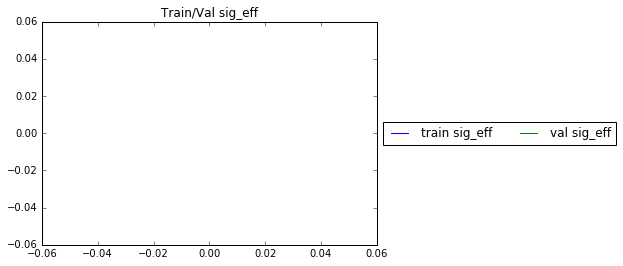

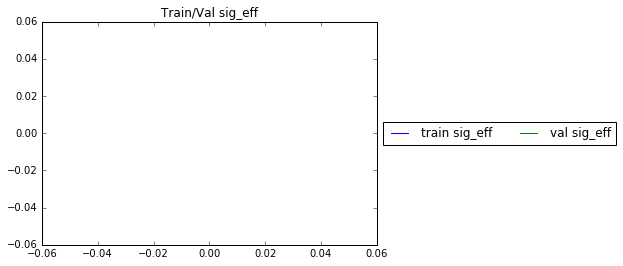

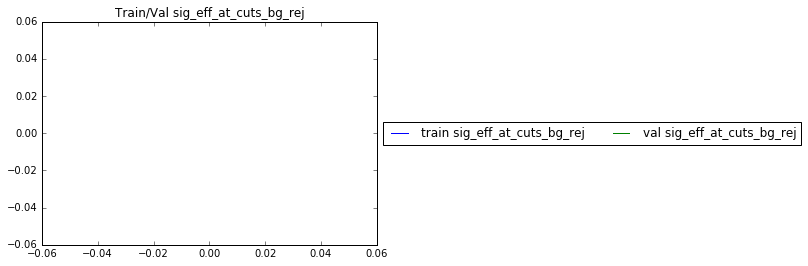

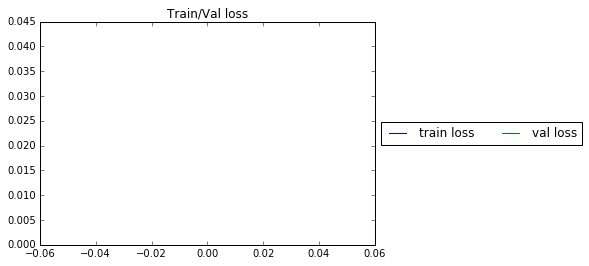

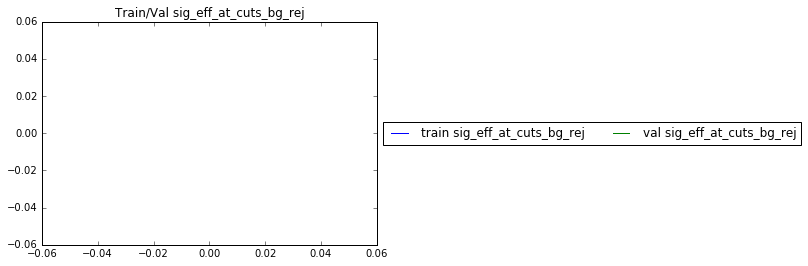

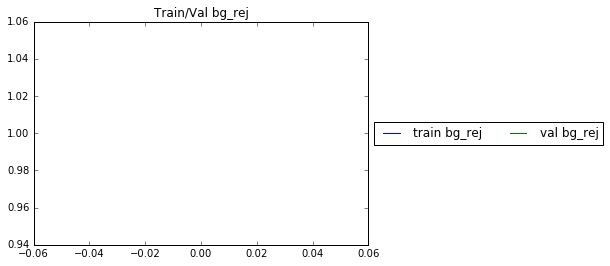

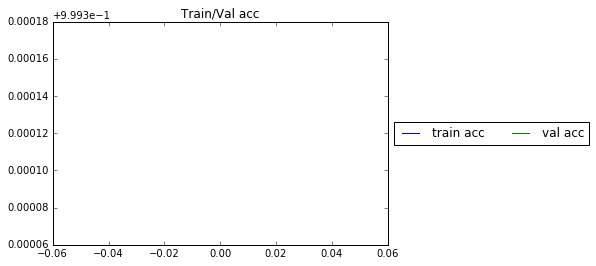

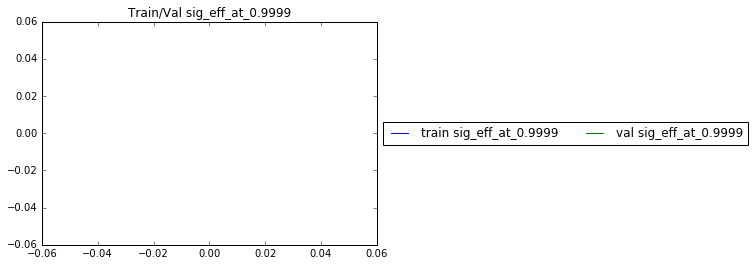

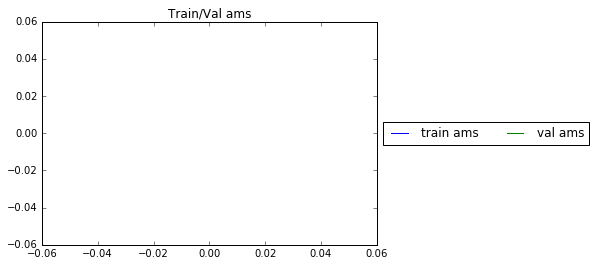

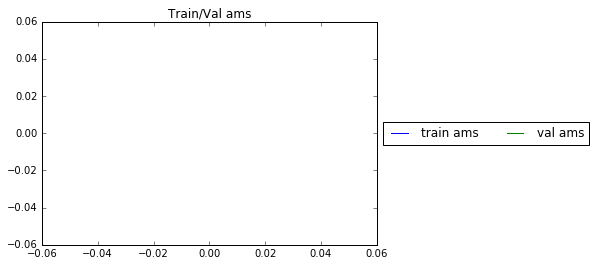

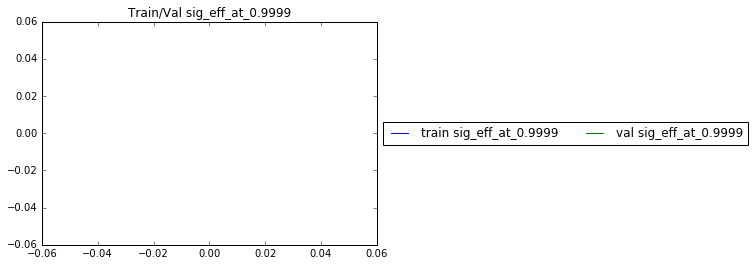

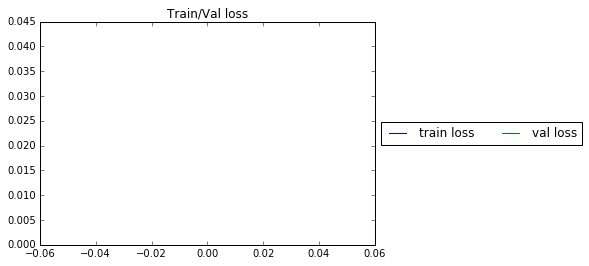

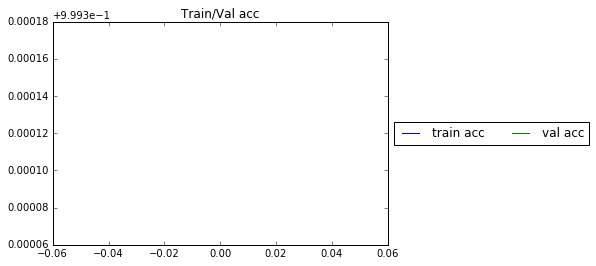

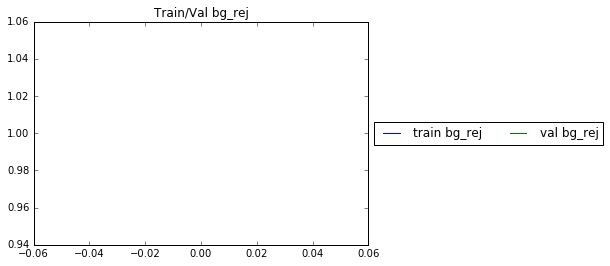

Epoch 1 of 20000 took 39.429s
		tr_sig_eff:		0.0000 %
		tr_phys_cuts_sig_eff:		23.3939 %
		tr_sig_eff_at_cuts_bg_rej:		0.0000 %
		tr_phys_cuts_ams:		0.0005
		tr_phys_cuts_bg_rej:		99.9999 %
		tr_bg_rej:		100.0000 %
		tr_acc:		99.9369 %
		tr_ams:		0.0000
		tr_sig_eff_at_0.9999:		0.0000 %
		tr_loss:		0.0427
	Validation took 3.798s
		val_sig_eff:		0.0000 %
		val_phys_cuts_ams:		0.0001
		val_loss:		0.0011
		val_phys_cuts_bg_rej:		99.9998 %
		val_sig_eff_at_cuts_bg_rej:		0.0000 %
		val_sig_eff_at_0.9999:		0.0000 %
		val_ams:		0.0000
		val_phys_cuts_sig_eff:		25.1429 %
		val_acc:		99.9476 %
		val_bg_rej:		100.0000 %


beginning epoch 1
beginning epoch 1


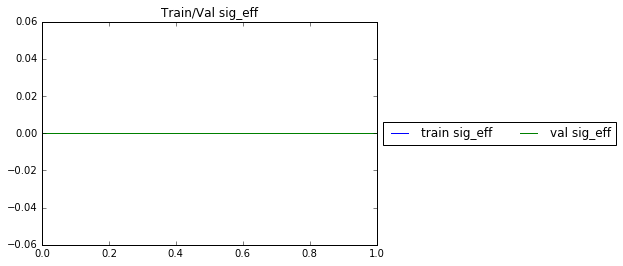

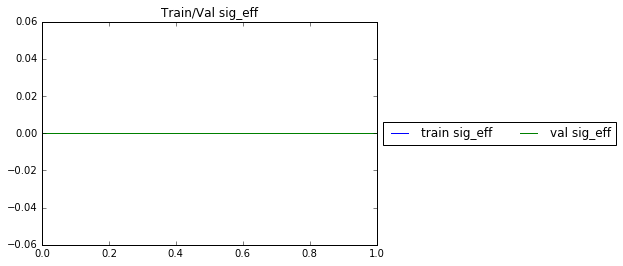

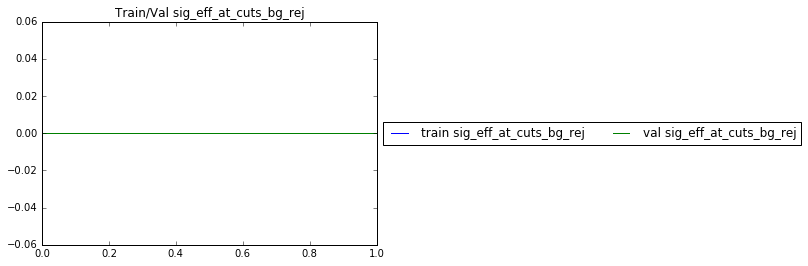

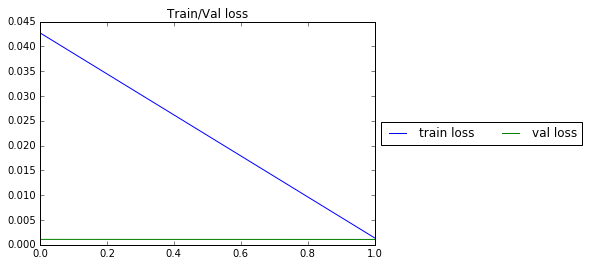

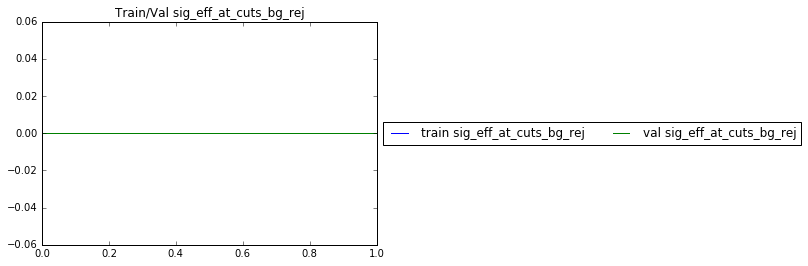

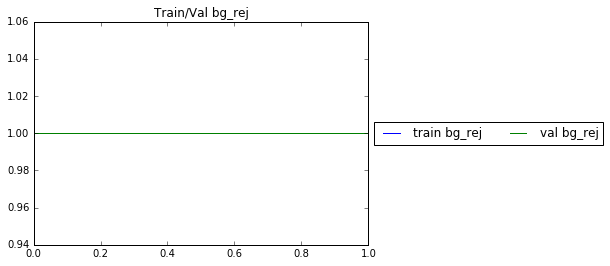

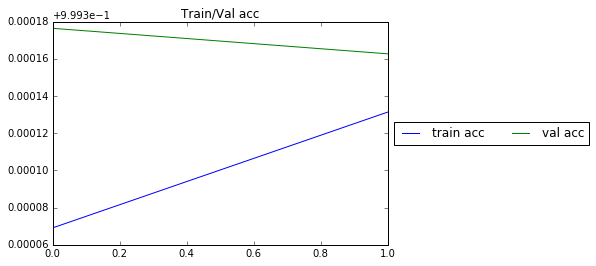

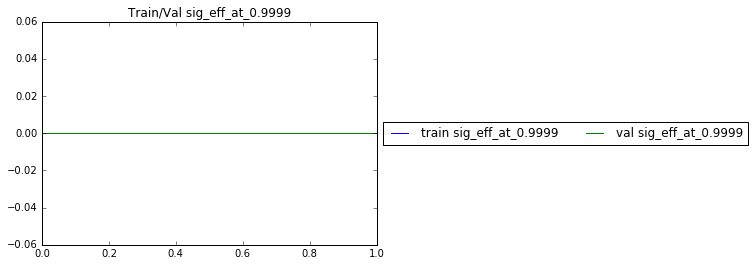

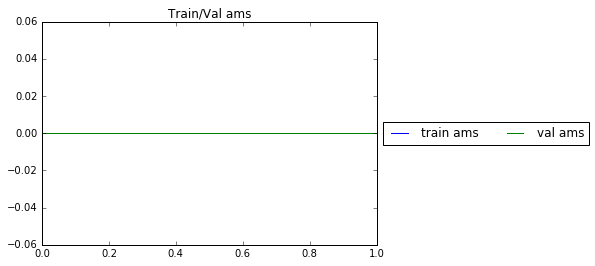

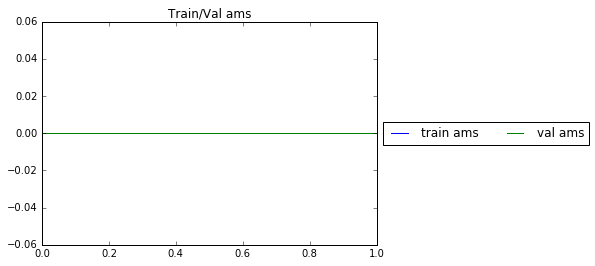

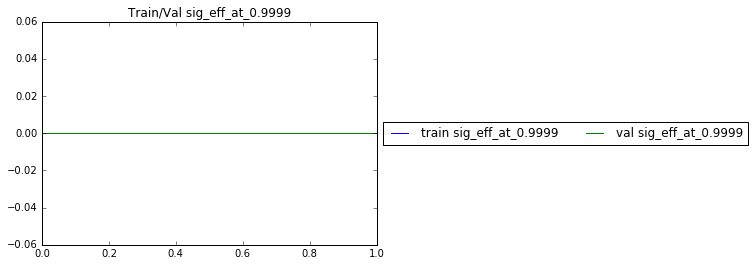

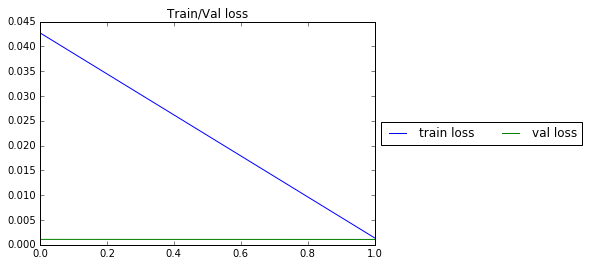

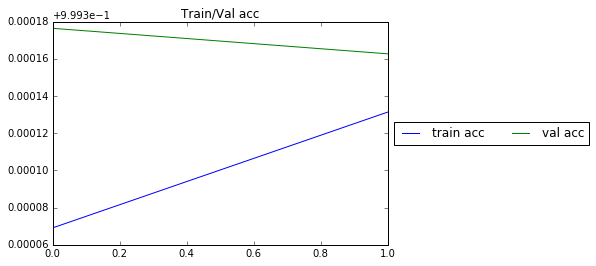

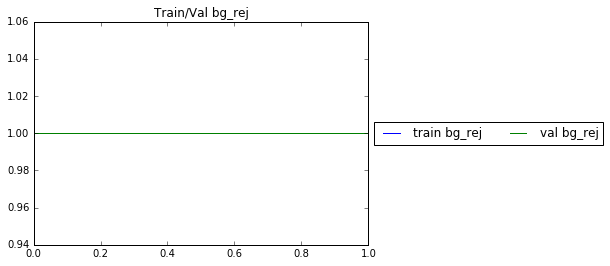

Epoch 2 of 20000 took 39.485s
		tr_sig_eff:		0.0000 %
		tr_phys_cuts_sig_eff:		23.3939 %
		tr_sig_eff_at_cuts_bg_rej:		0.0000 %
		tr_phys_cuts_ams:		0.0005
		tr_phys_cuts_bg_rej:		99.9999 %
		tr_bg_rej:		100.0000 %
		tr_acc:		99.9431 %
		tr_ams:		0.0000
		tr_sig_eff_at_0.9999:		0.0000 %
		tr_loss:		0.0014
	Validation took 4.155s
		val_sig_eff:		0.0000 %
		val_phys_cuts_ams:		0.0001
		val_loss:		0.0011
		val_phys_cuts_bg_rej:		99.9998 %
		val_sig_eff_at_cuts_bg_rej:		0.0000 %
		val_sig_eff_at_0.9999:		0.0000 %
		val_ams:		0.0000
		val_phys_cuts_sig_eff:		25.1429 %
		val_acc:		99.9463 %
		val_bg_rej:		100.0000 %


beginning epoch 2
beginning epoch 2


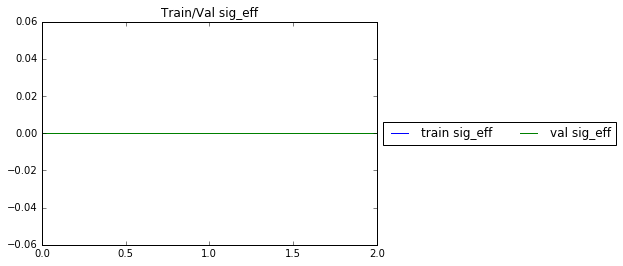

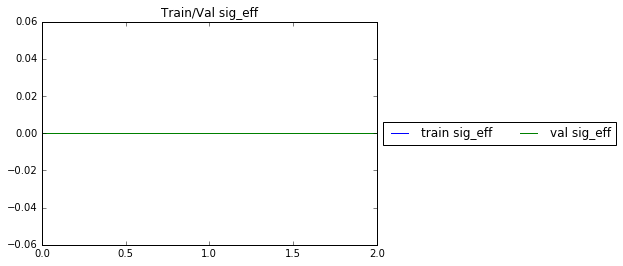

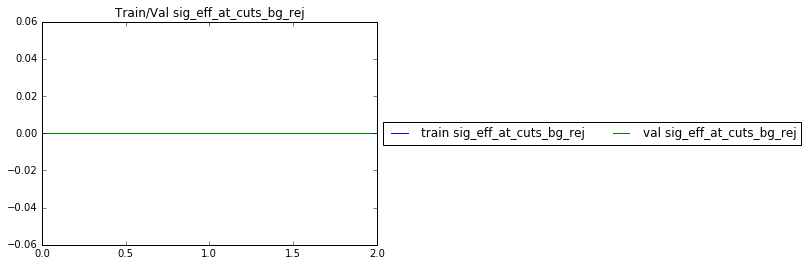

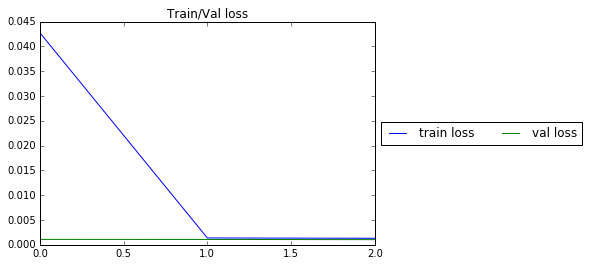

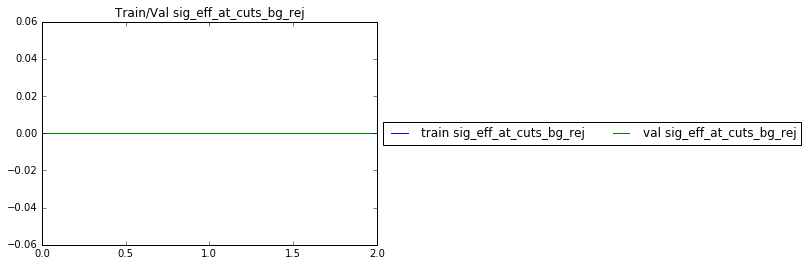

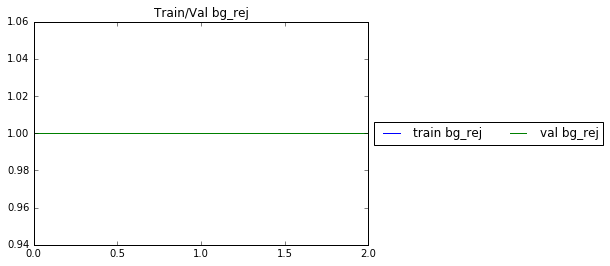

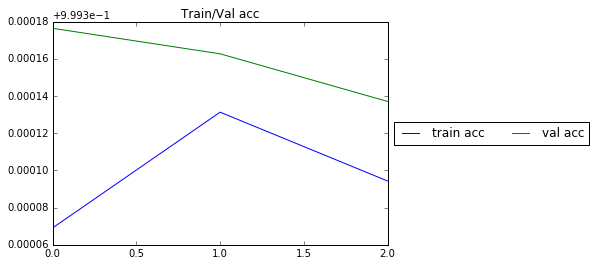

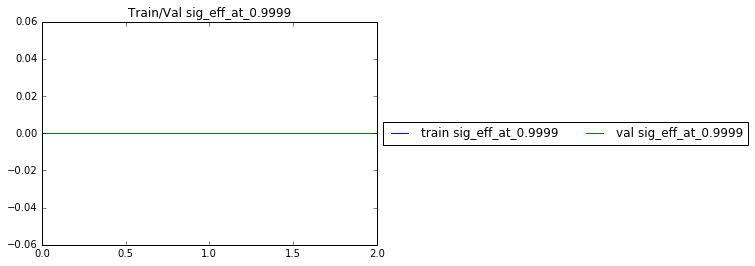

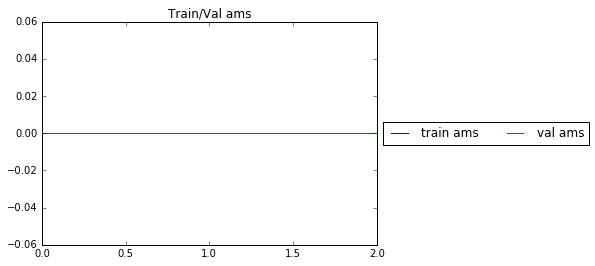

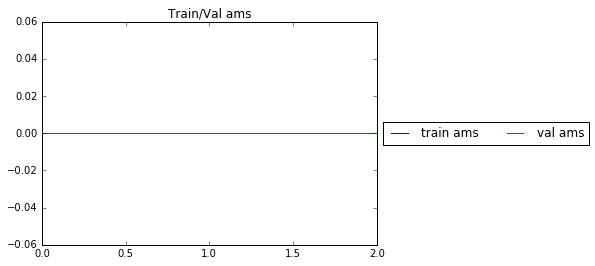

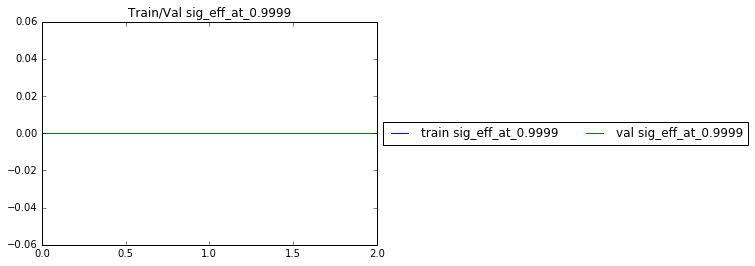

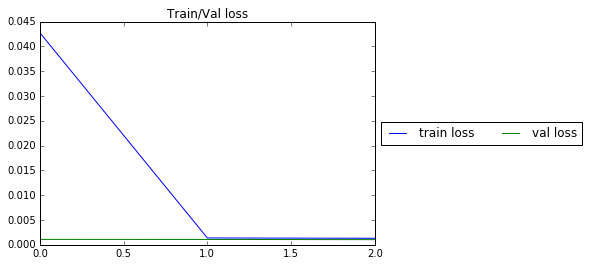

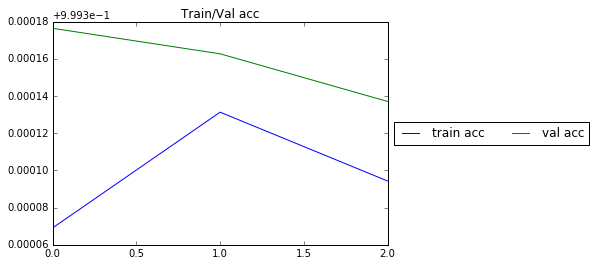

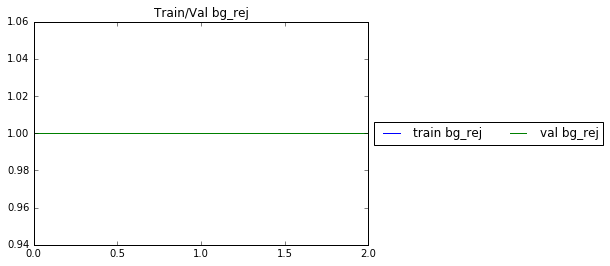

Epoch 3 of 20000 took 39.839s
		tr_sig_eff:		0.0000 %
		tr_phys_cuts_sig_eff:		23.3939 %
		tr_sig_eff_at_cuts_bg_rej:		0.0000 %
		tr_phys_cuts_ams:		0.0005
		tr_phys_cuts_bg_rej:		99.9999 %
		tr_bg_rej:		100.0000 %
		tr_acc:		99.9394 %
		tr_ams:		0.0000
		tr_sig_eff_at_0.9999:		0.0000 %
		tr_loss:		0.0013
	Validation took 3.890s
		val_sig_eff:		0.0000 %
		val_phys_cuts_ams:		0.0001
		val_loss:		0.0010
		val_phys_cuts_bg_rej:		99.9998 %
		val_sig_eff_at_cuts_bg_rej:		0.0000 %
		val_sig_eff_at_0.9999:		0.0000 %
		val_ams:		0.0000
		val_phys_cuts_sig_eff:		25.1429 %
		val_acc:		99.9437 %
		val_bg_rej:		100.0000 %


beginning epoch 3
beginning epoch 3


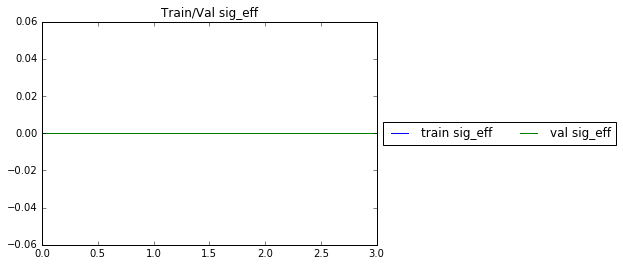

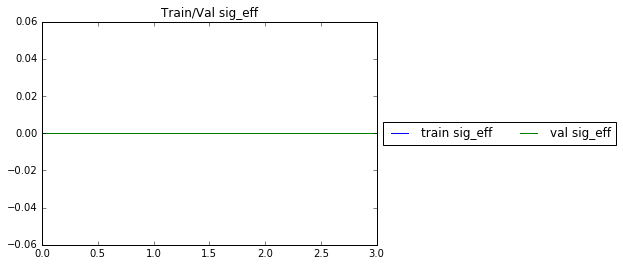

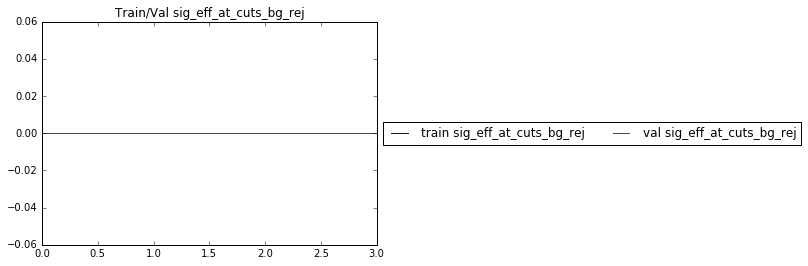

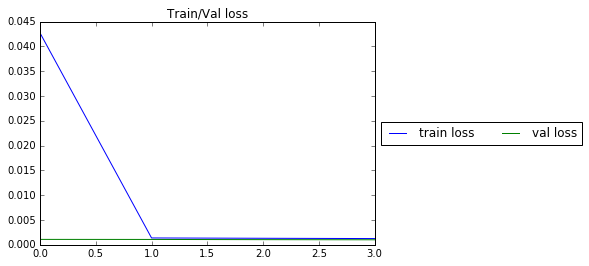

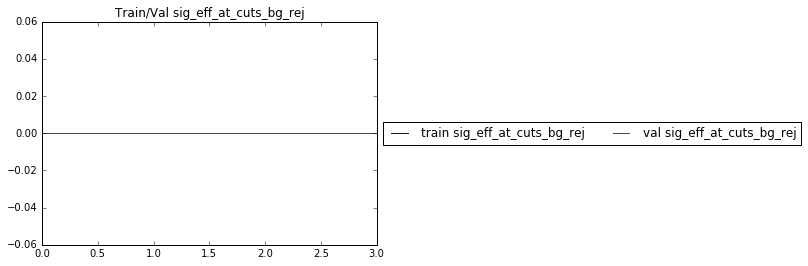

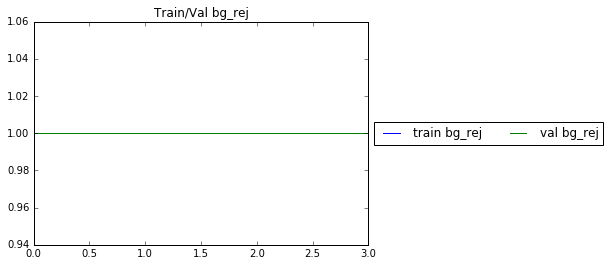

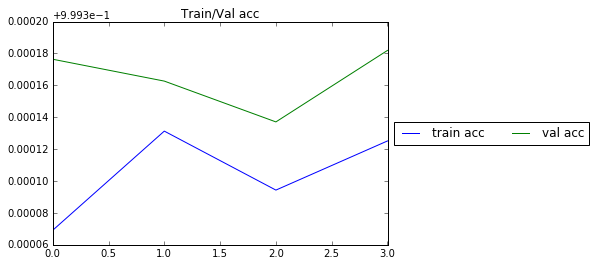

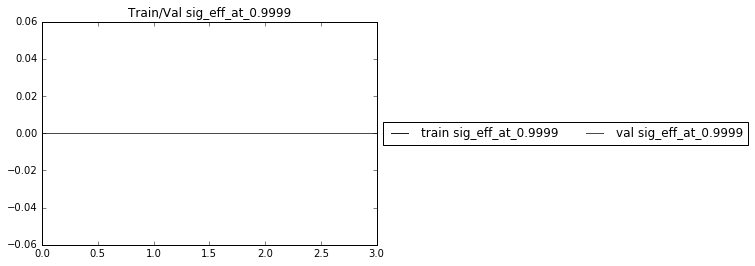

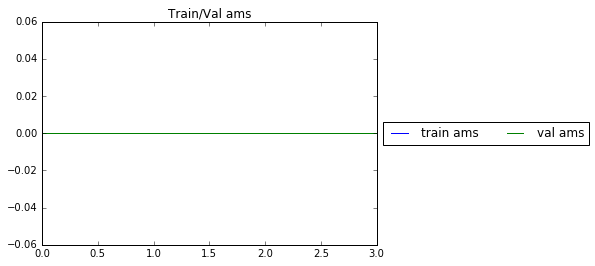

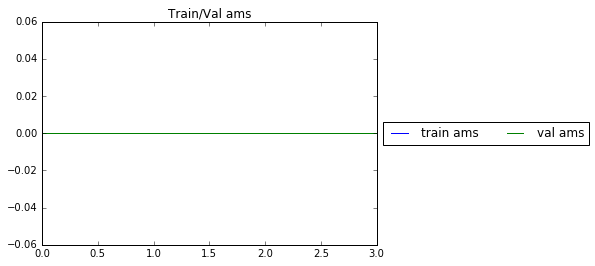

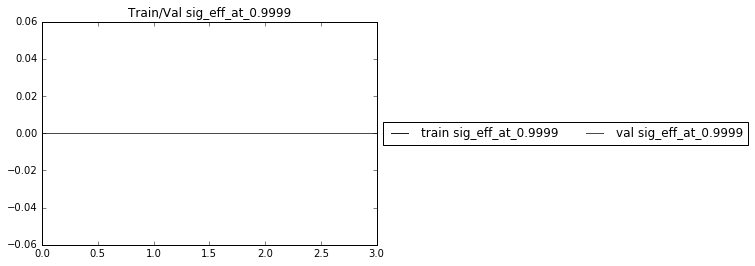

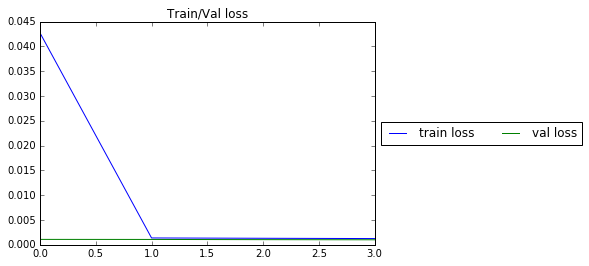

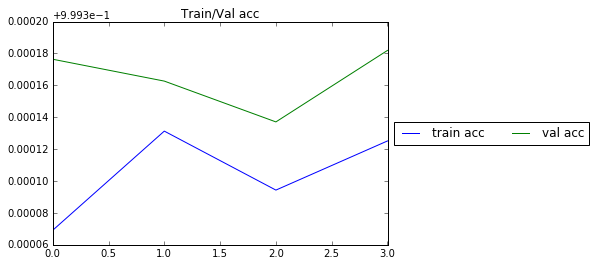

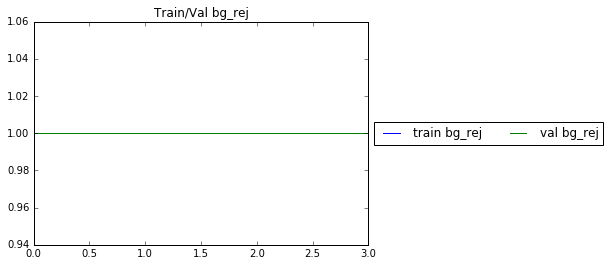

Epoch 4 of 20000 took 40.108s
		tr_sig_eff:		0.0000 %
		tr_phys_cuts_sig_eff:		23.3939 %
		tr_sig_eff_at_cuts_bg_rej:		0.0000 %
		tr_phys_cuts_ams:		0.0005
		tr_phys_cuts_bg_rej:		99.9999 %
		tr_bg_rej:		100.0000 %
		tr_acc:		99.9425 %
		tr_ams:		0.0000
		tr_sig_eff_at_0.9999:		0.0000 %
		tr_loss:		0.0013
	Validation took 3.544s
		val_sig_eff:		0.0000 %
		val_phys_cuts_ams:		0.0001
		val_loss:		0.0010
		val_phys_cuts_bg_rej:		99.9998 %
		val_sig_eff_at_cuts_bg_rej:		0.0000 %
		val_sig_eff_at_0.9999:		0.0000 %
		val_ams:		0.0000
		val_phys_cuts_sig_eff:		25.1429 %
		val_acc:		99.9482 %
		val_bg_rej:		100.0000 %


beginning epoch 4
beginning epoch 4


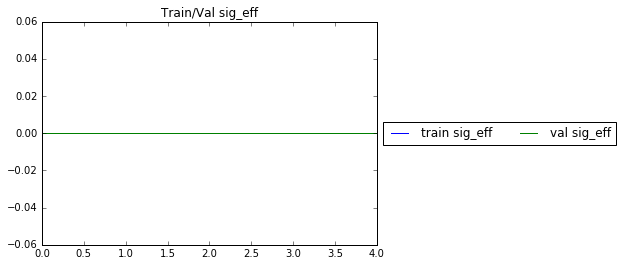

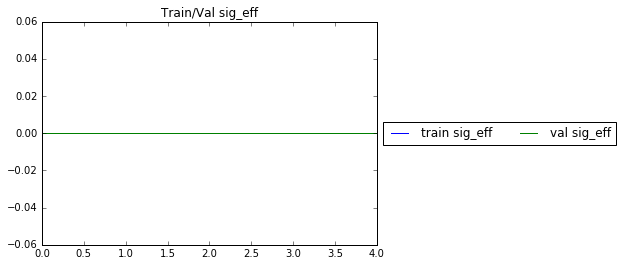

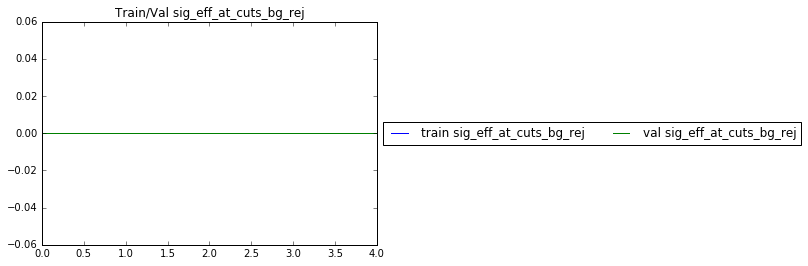

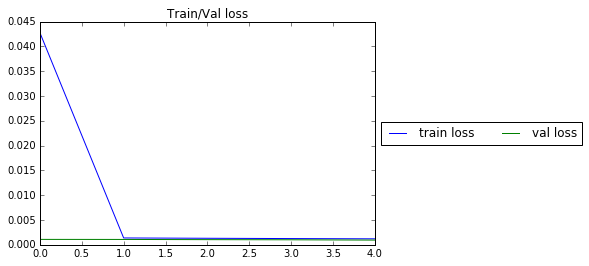

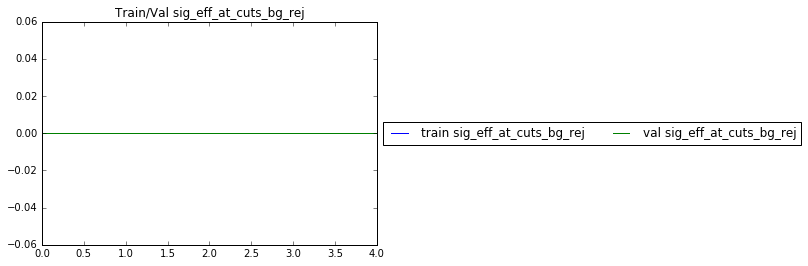

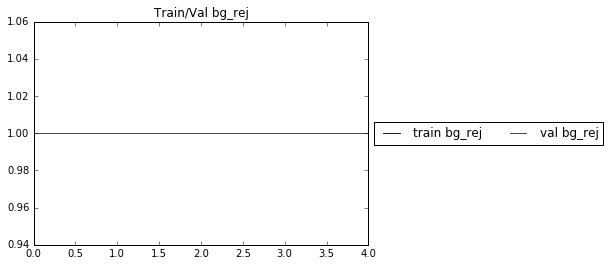

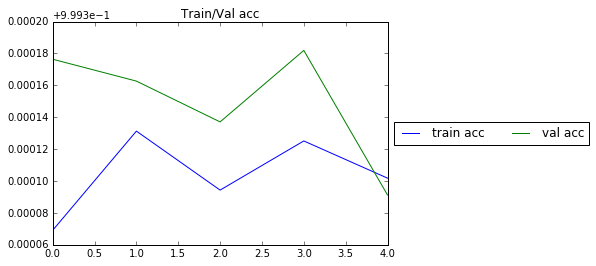

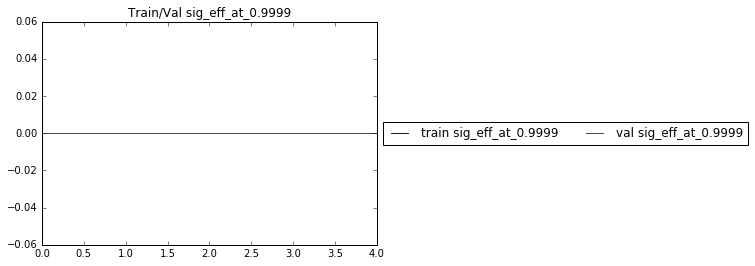

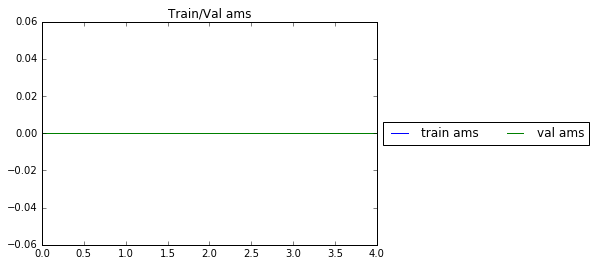

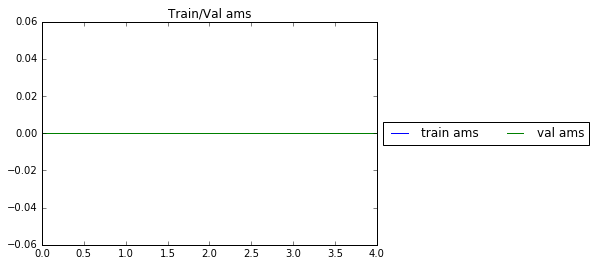

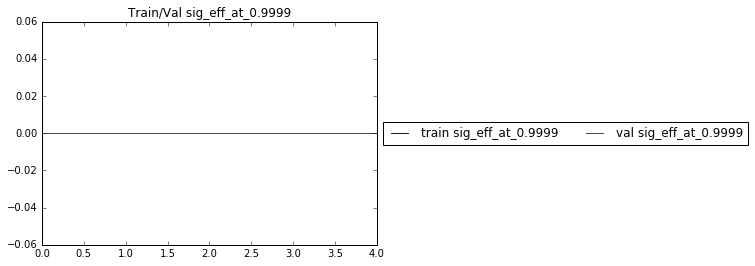

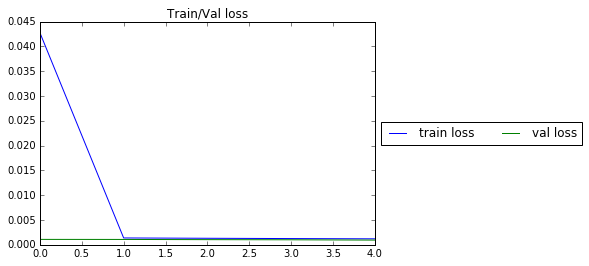

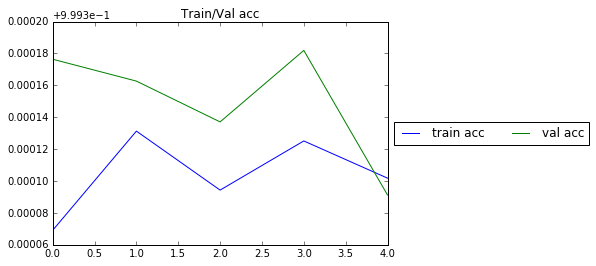

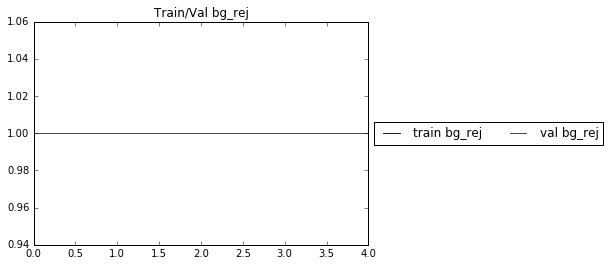

Epoch 5 of 20000 took 39.391s
		tr_sig_eff:		0.0000 %
		tr_phys_cuts_sig_eff:		23.3939 %
		tr_sig_eff_at_cuts_bg_rej:		0.0000 %
		tr_phys_cuts_ams:		0.0005
		tr_phys_cuts_bg_rej:		99.9999 %
		tr_bg_rej:		100.0000 %
		tr_acc:		99.9402 %
		tr_ams:		0.0000
		tr_sig_eff_at_0.9999:		0.0000 %
		tr_loss:		0.0012
	Validation took 3.386s
		val_sig_eff:		0.0000 %
		val_phys_cuts_ams:		0.0001
		val_loss:		0.0010
		val_phys_cuts_bg_rej:		99.9998 %
		val_sig_eff_at_cuts_bg_rej:		0.0000 %
		val_sig_eff_at_0.9999:		0.0000 %
		val_ams:		0.0000
		val_phys_cuts_sig_eff:		25.1429 %
		val_acc:		99.9391 %
		val_bg_rej:		100.0000 %


beginning epoch 5
beginning epoch 5


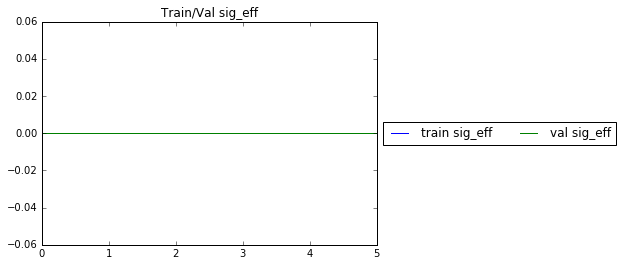

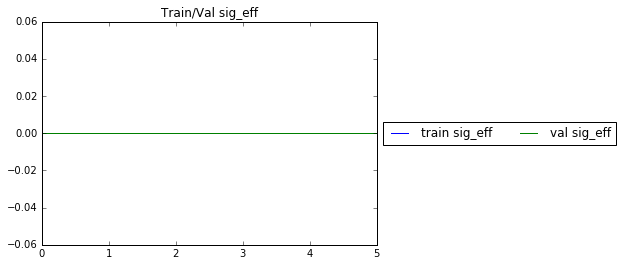

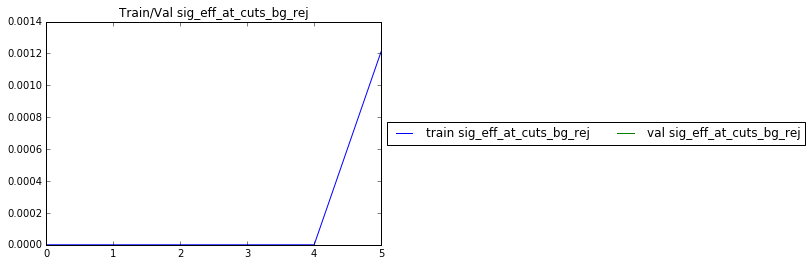

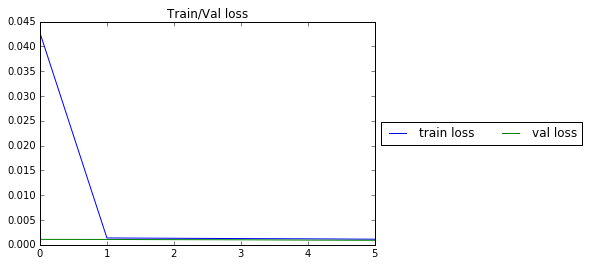

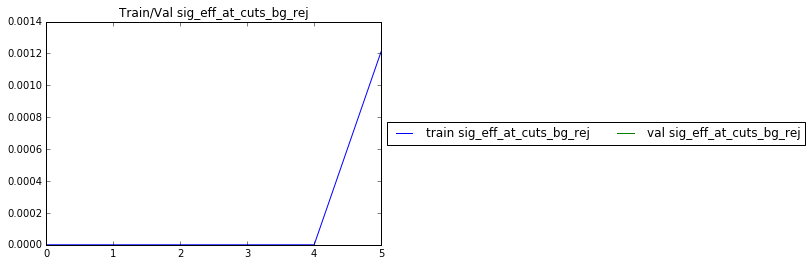

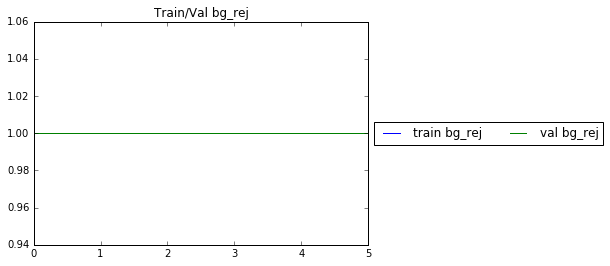

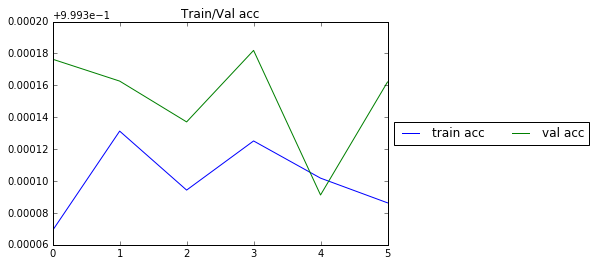

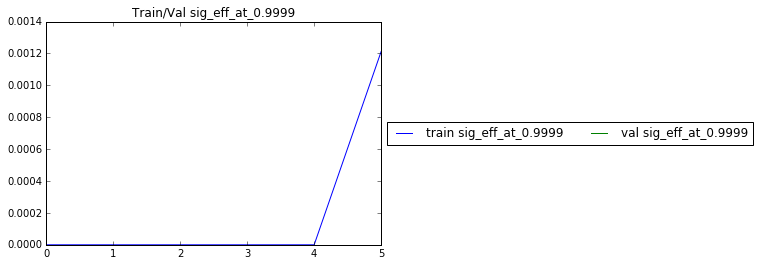

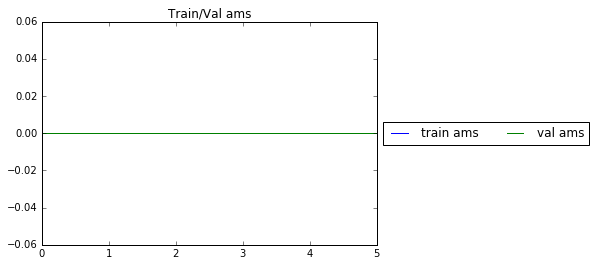

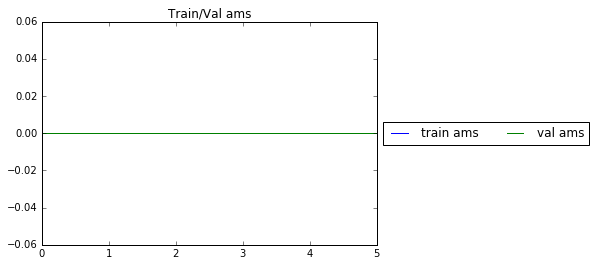

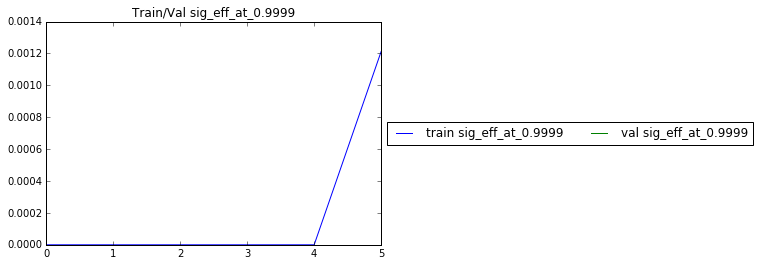

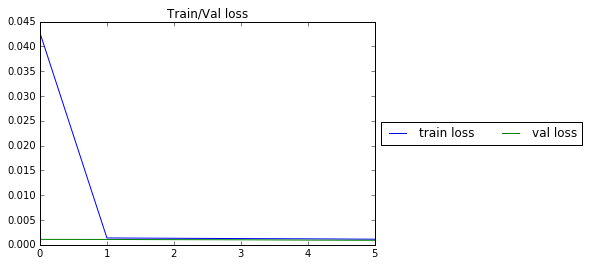

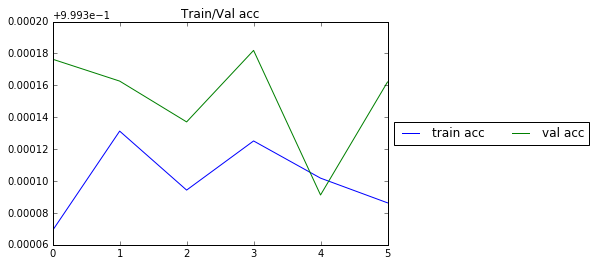

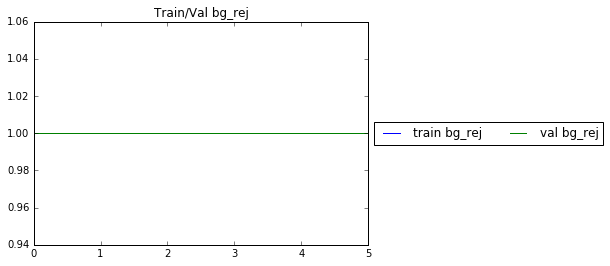

Epoch 6 of 20000 took 38.611s
		tr_sig_eff:		0.0000 %
		tr_phys_cuts_sig_eff:		23.3939 %
		tr_sig_eff_at_cuts_bg_rej:		0.1212 %
		tr_phys_cuts_ams:		0.0005
		tr_phys_cuts_bg_rej:		99.9999 %
		tr_bg_rej:		100.0000 %
		tr_acc:		99.9386 %
		tr_ams:		0.0000
		tr_sig_eff_at_0.9999:		0.1212 %
		tr_loss:		0.0011
	Validation took 3.892s
		val_sig_eff:		0.0000 %
		val_phys_cuts_ams:		0.0001
		val_loss:		0.0009
		val_phys_cuts_bg_rej:		99.9998 %
		val_sig_eff_at_cuts_bg_rej:		0.0000 %
		val_sig_eff_at_0.9999:		0.0000 %
		val_ams:		0.0000
		val_phys_cuts_sig_eff:		25.1429 %
		val_acc:		99.9462 %
		val_bg_rej:		100.0000 %


beginning epoch 6
beginning epoch 6


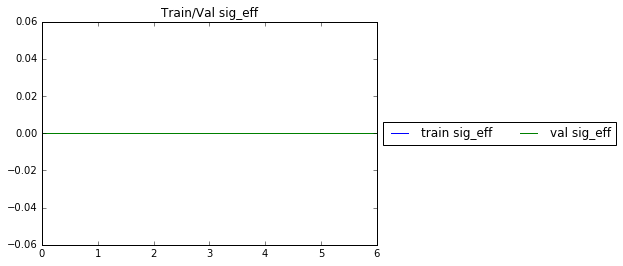

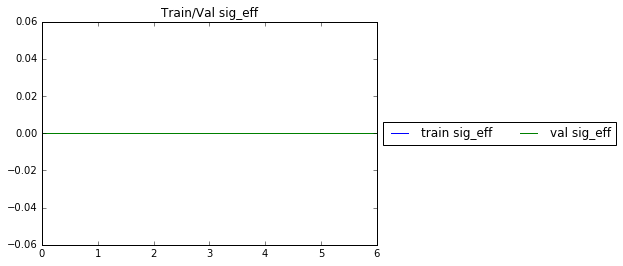

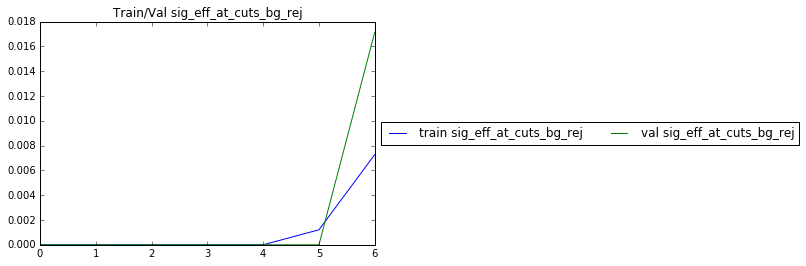

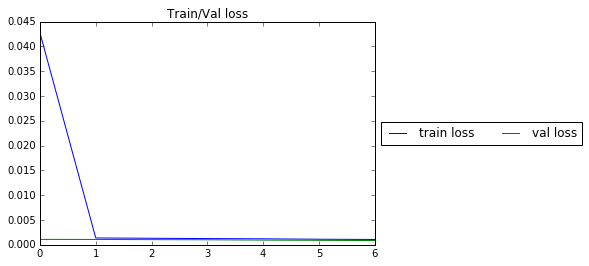

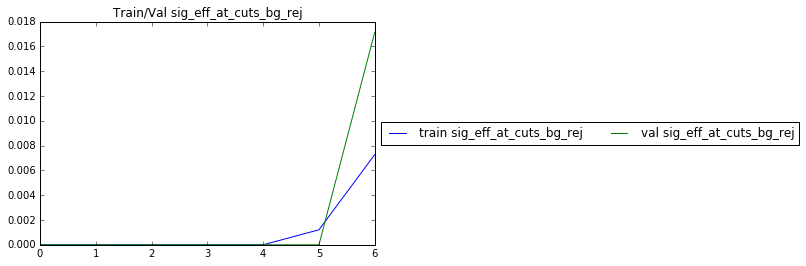

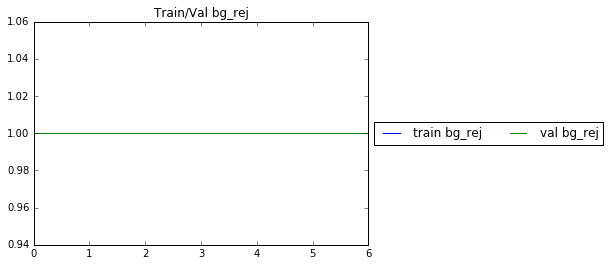

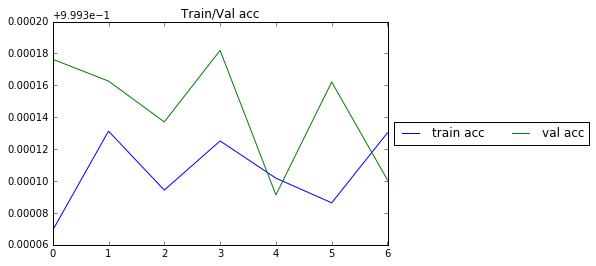

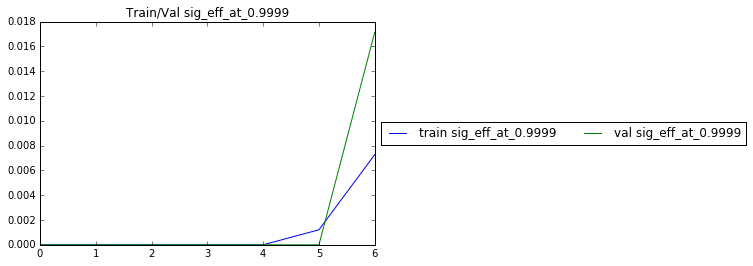

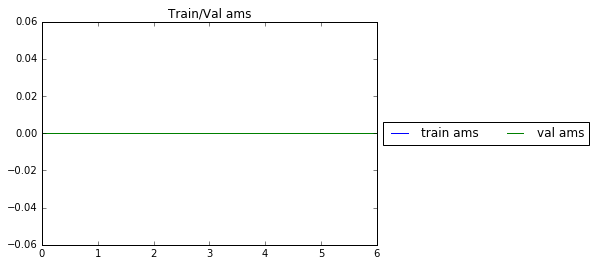

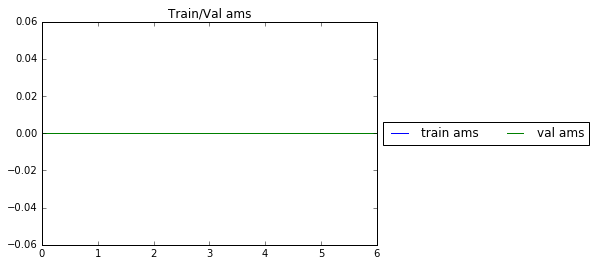

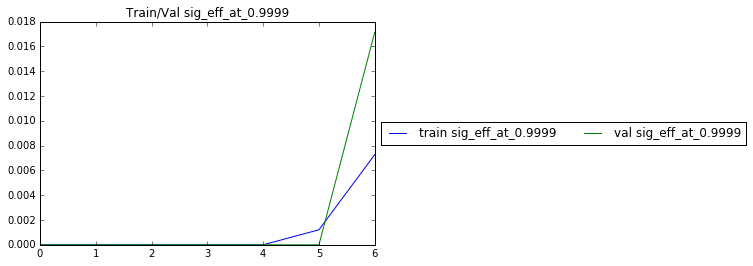

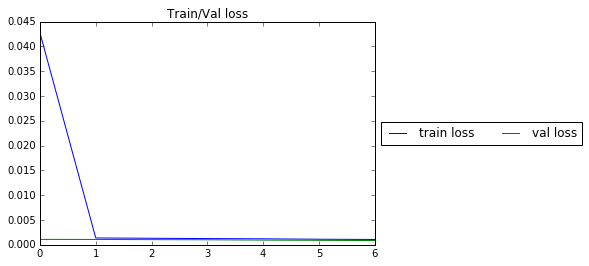

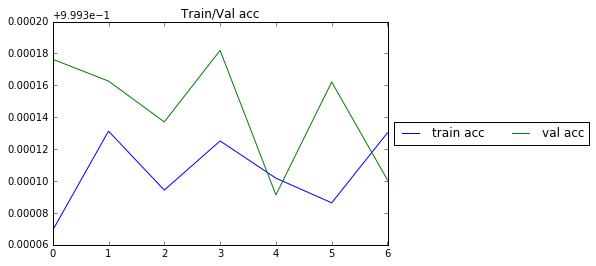

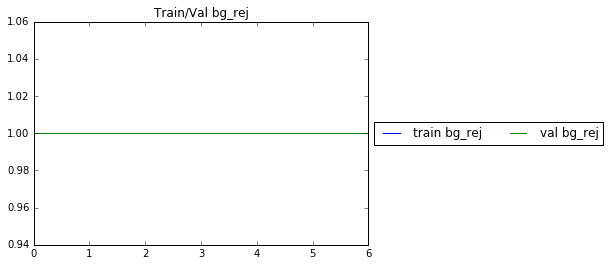

Epoch 7 of 20000 took 39.921s
		tr_sig_eff:		0.0000 %
		tr_phys_cuts_sig_eff:		23.3939 %
		tr_sig_eff_at_cuts_bg_rej:		0.7273 %
		tr_phys_cuts_ams:		0.0005
		tr_phys_cuts_bg_rej:		99.9999 %
		tr_bg_rej:		100.0000 %
		tr_acc:		99.9430 %
		tr_ams:		0.0000
		tr_sig_eff_at_0.9999:		0.7273 %
		tr_loss:		0.0011
	Validation took 3.552s
		val_sig_eff:		0.0000 %
		val_phys_cuts_ams:		0.0001
		val_loss:		0.0009
		val_phys_cuts_bg_rej:		99.9998 %
		val_sig_eff_at_cuts_bg_rej:		1.7143 %
		val_sig_eff_at_0.9999:		1.7143 %
		val_ams:		0.0000
		val_phys_cuts_sig_eff:		25.1429 %
		val_acc:		99.9401 %
		val_bg_rej:		100.0000 %


beginning epoch 7
beginning epoch 7


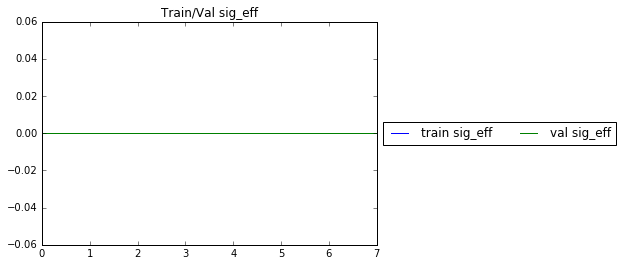

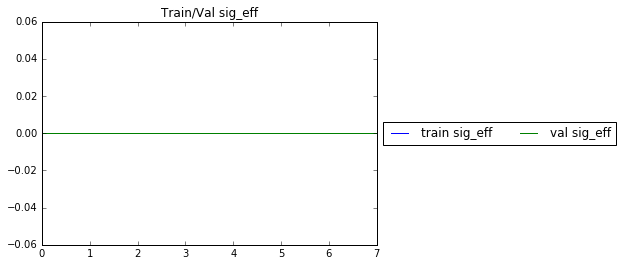

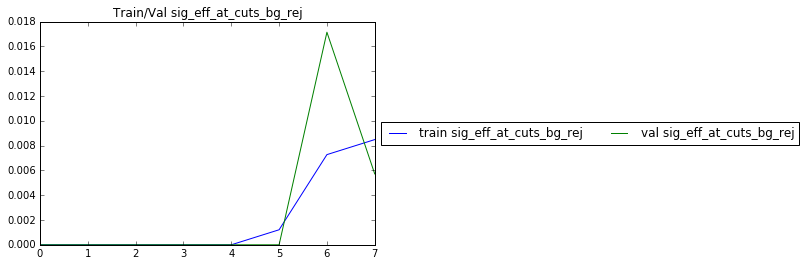

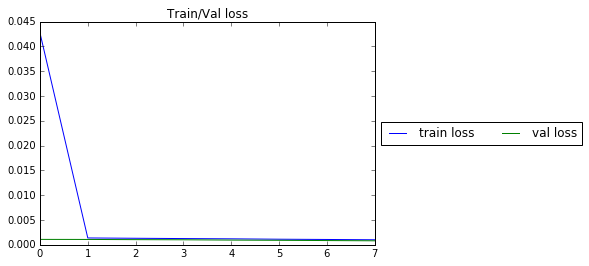

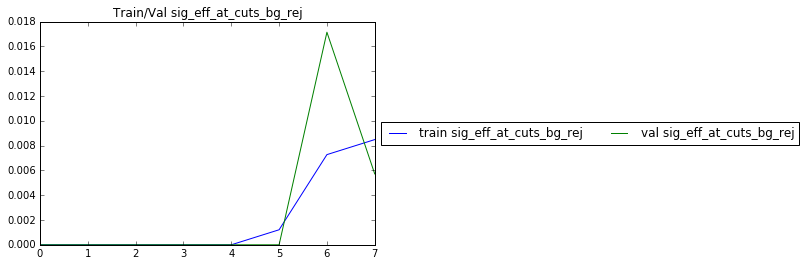

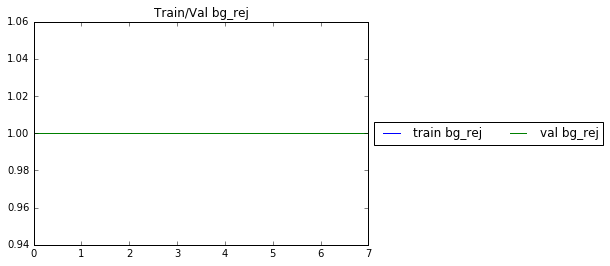

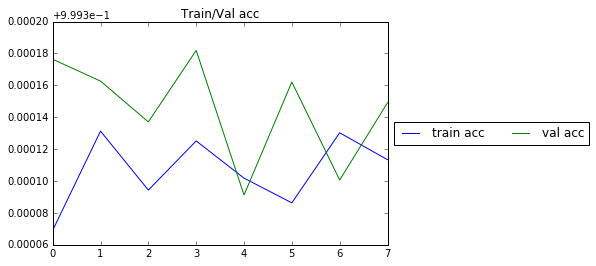

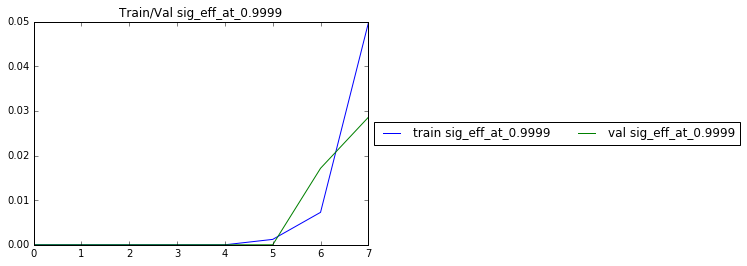

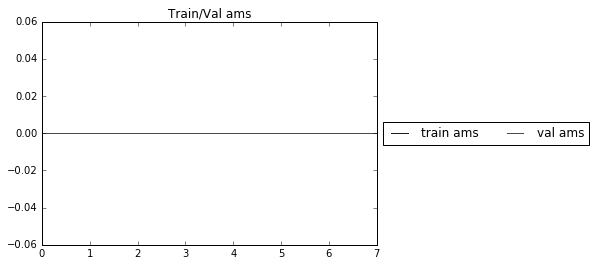

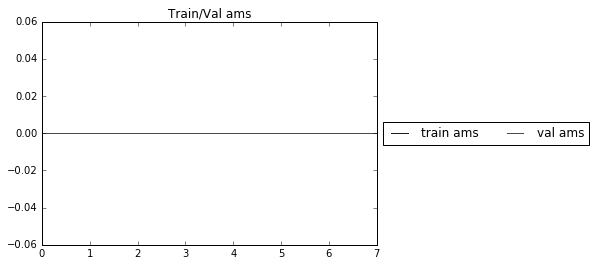

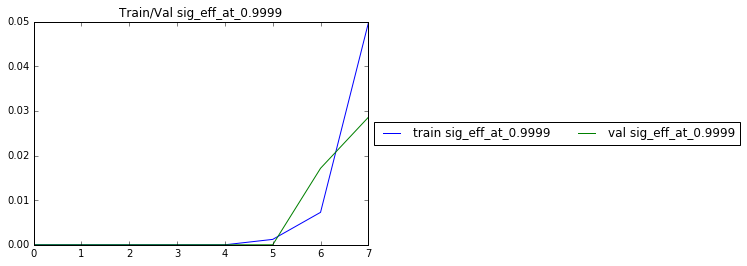

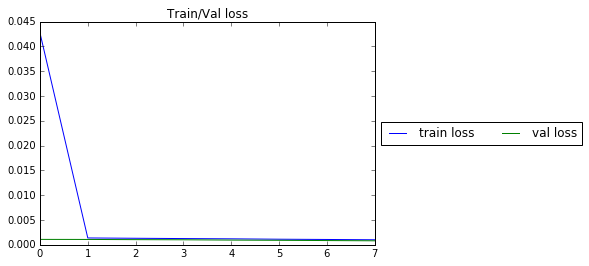

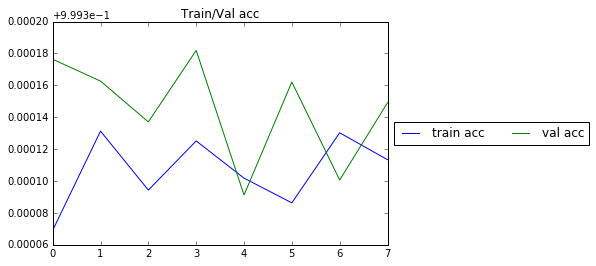

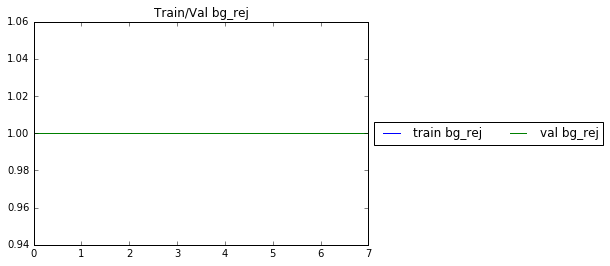

Epoch 8 of 20000 took 37.240s
		tr_sig_eff:		0.0000 %
		tr_phys_cuts_sig_eff:		23.3939 %
		tr_sig_eff_at_cuts_bg_rej:		0.8485 %
		tr_phys_cuts_ams:		0.0005
		tr_phys_cuts_bg_rej:		99.9999 %
		tr_bg_rej:		100.0000 %
		tr_acc:		99.9413 %
		tr_ams:		0.0000
		tr_sig_eff_at_0.9999:		4.9697 %
		tr_loss:		0.0010
	Validation took 3.831s
		val_sig_eff:		0.0000 %
		val_phys_cuts_ams:		0.0001
		val_loss:		0.0008
		val_phys_cuts_bg_rej:		99.9998 %
		val_sig_eff_at_cuts_bg_rej:		0.5714 %
		val_sig_eff_at_0.9999:		2.8571 %
		val_ams:		0.0000
		val_phys_cuts_sig_eff:		25.1429 %
		val_acc:		99.9449 %
		val_bg_rej:		100.0000 %


beginning epoch 8
beginning epoch 8


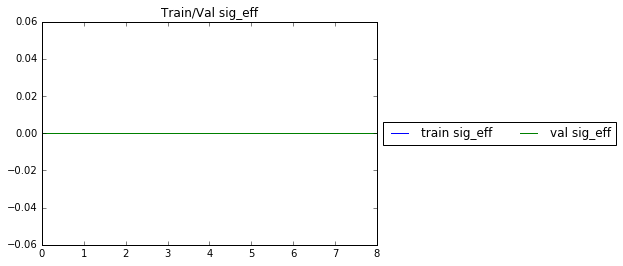

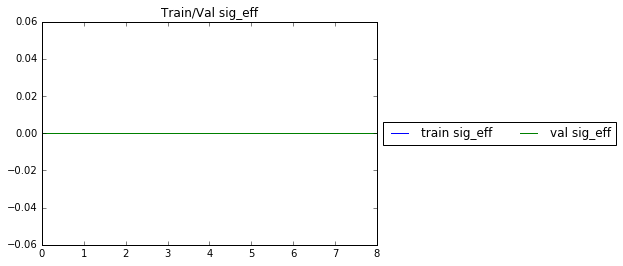

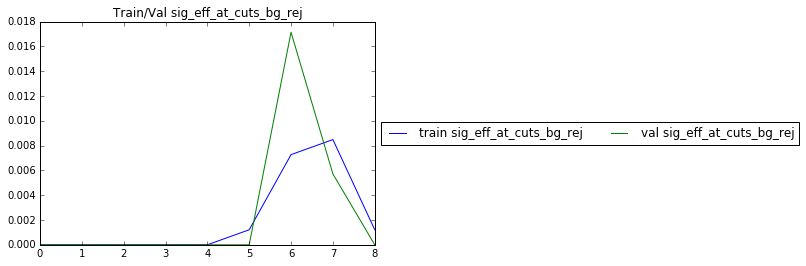

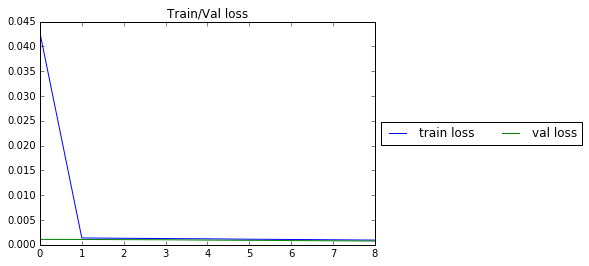

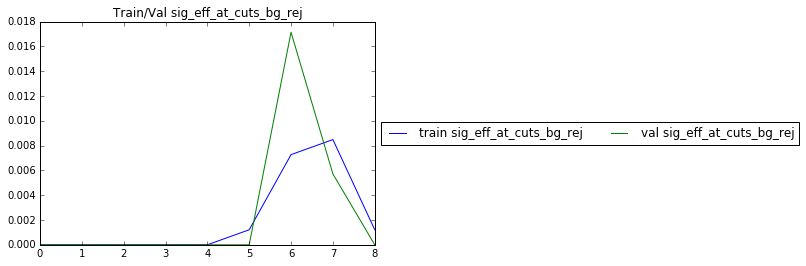

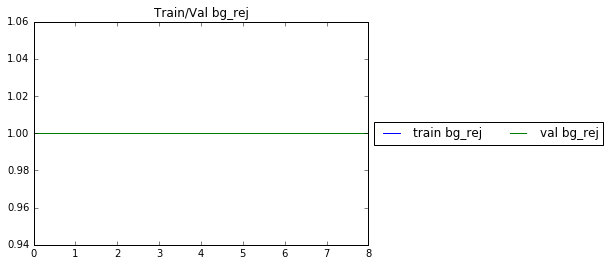

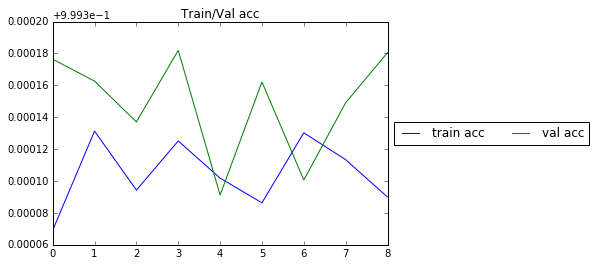

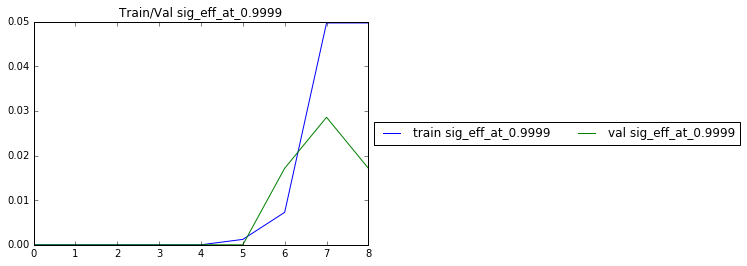

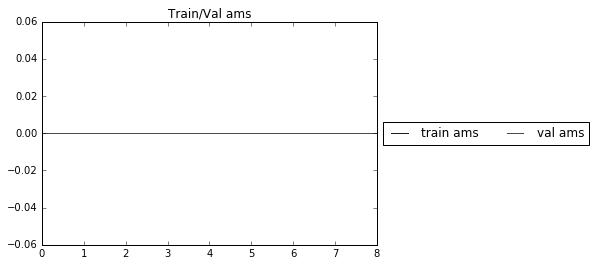

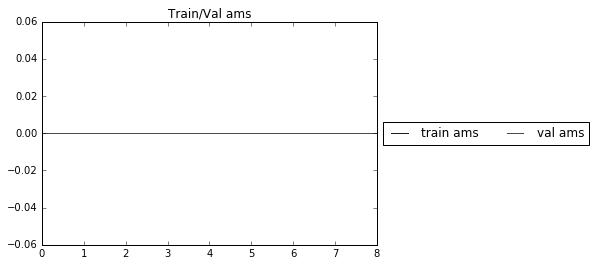

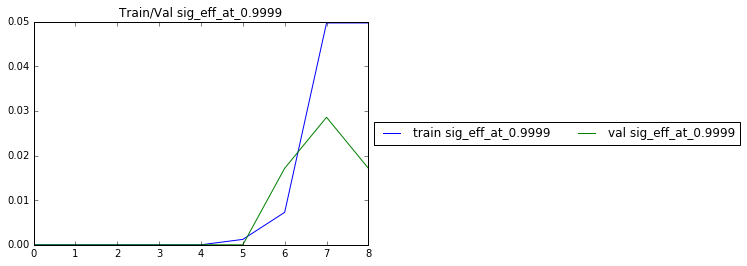

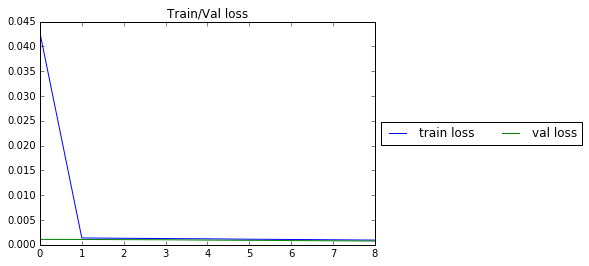

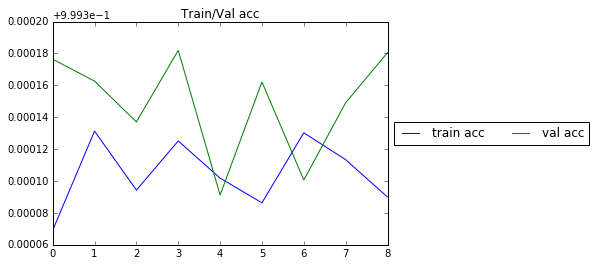

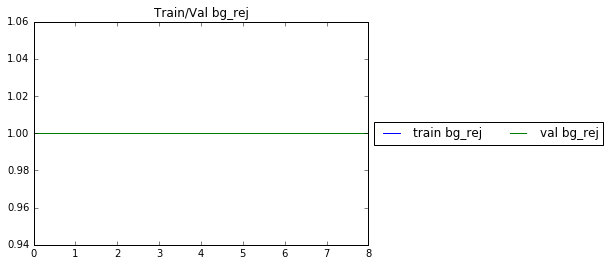

Epoch 9 of 20000 took 38.132s
		tr_sig_eff:		0.0000 %
		tr_phys_cuts_sig_eff:		23.3939 %
		tr_sig_eff_at_cuts_bg_rej:		0.1212 %
		tr_phys_cuts_ams:		0.0005
		tr_phys_cuts_bg_rej:		99.9999 %
		tr_bg_rej:		100.0000 %
		tr_acc:		99.9390 %
		tr_ams:		0.0000
		tr_sig_eff_at_0.9999:		4.9697 %
		tr_loss:		0.0010
	Validation took 3.768s
		val_sig_eff:		0.0000 %
		val_phys_cuts_ams:		0.0001
		val_loss:		0.0008
		val_phys_cuts_bg_rej:		99.9998 %
		val_sig_eff_at_cuts_bg_rej:		0.0000 %
		val_sig_eff_at_0.9999:		1.7143 %
		val_ams:		0.0000
		val_phys_cuts_sig_eff:		25.1429 %
		val_acc:		99.9481 %
		val_bg_rej:		100.0000 %


beginning epoch 9
beginning epoch 9


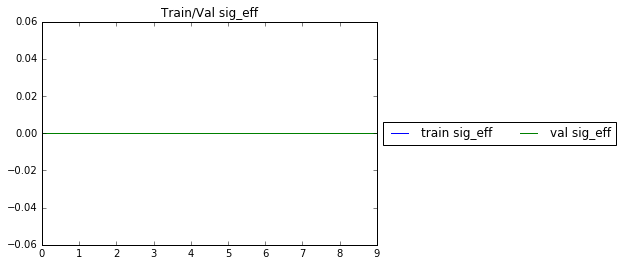

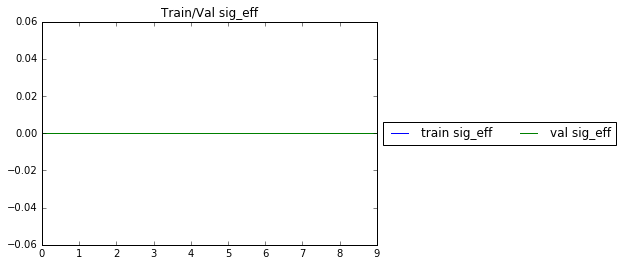

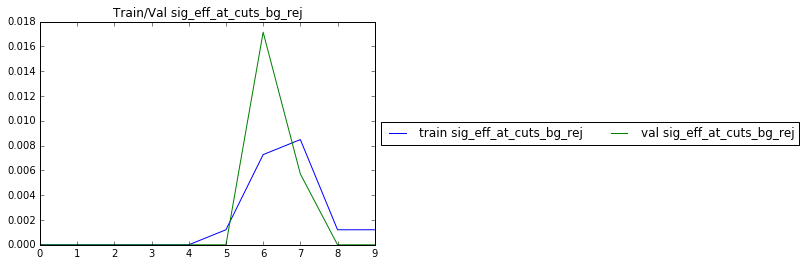

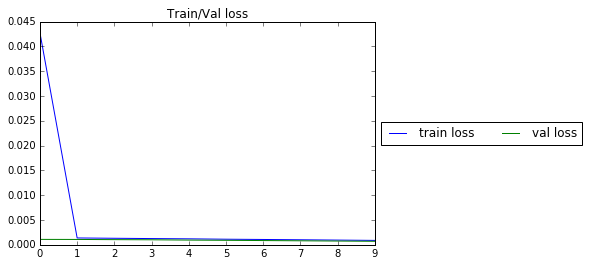

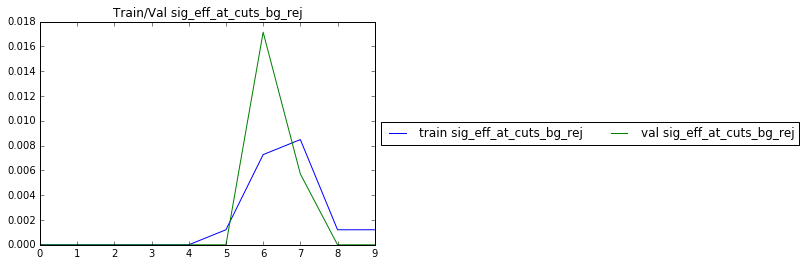

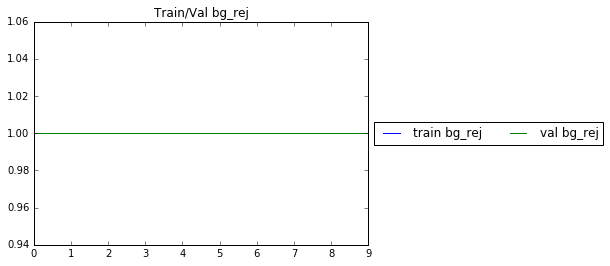

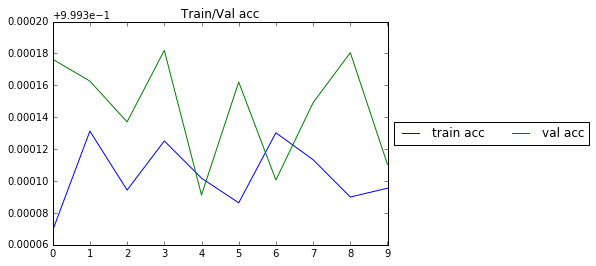

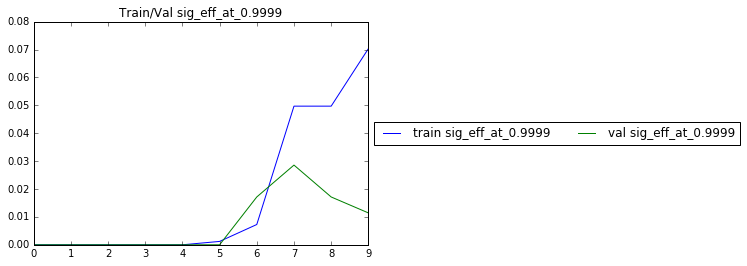

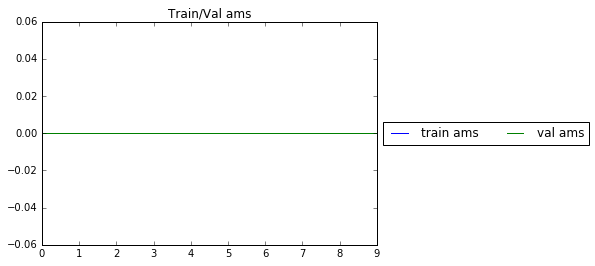

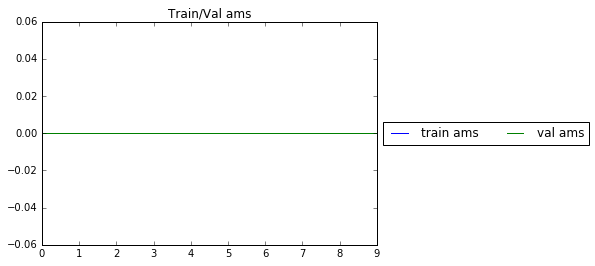

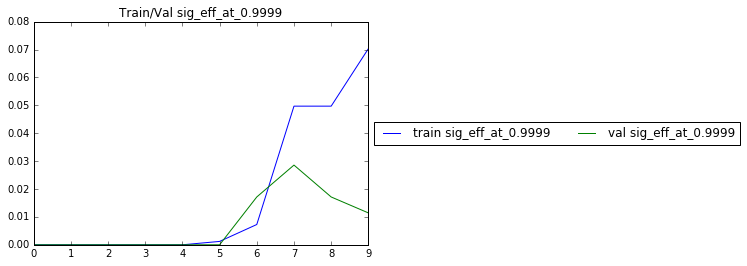

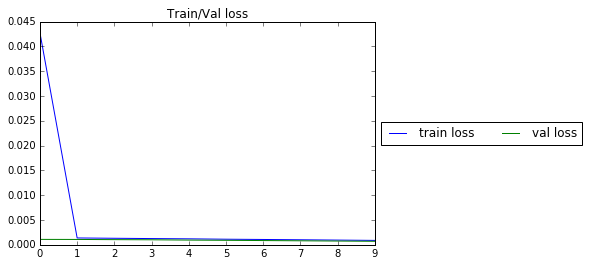

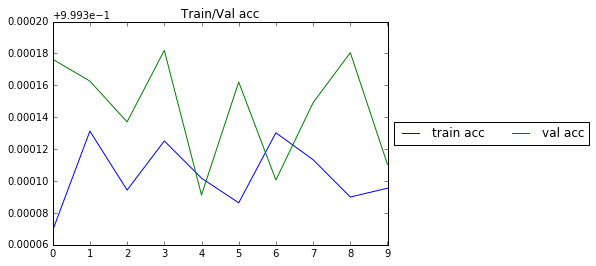

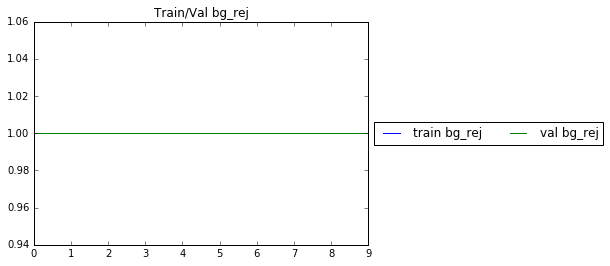

Epoch 10 of 20000 took 38.358s
		tr_sig_eff:		0.0000 %
		tr_phys_cuts_sig_eff:		23.3939 %
		tr_sig_eff_at_cuts_bg_rej:		0.1212 %
		tr_phys_cuts_ams:		0.0005
		tr_phys_cuts_bg_rej:		99.9999 %
		tr_bg_rej:		100.0000 %
		tr_acc:		99.9395 %
		tr_ams:		0.0000
		tr_sig_eff_at_0.9999:		7.0303 %
		tr_loss:		0.0009
	Validation took 3.873s
		val_sig_eff:		0.0000 %
		val_phys_cuts_ams:		0.0001
		val_loss:		0.0007
		val_phys_cuts_bg_rej:		99.9998 %
		val_sig_eff_at_cuts_bg_rej:		0.0000 %
		val_sig_eff_at_0.9999:		1.1429 %
		val_ams:		0.0000
		val_phys_cuts_sig_eff:		25.1429 %
		val_acc:		99.9410 %
		val_bg_rej:		100.0000 %


beginning epoch 10
beginning epoch 10


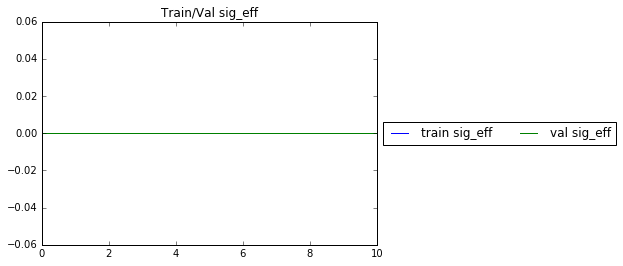

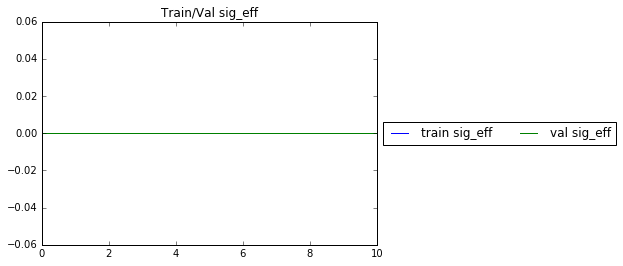

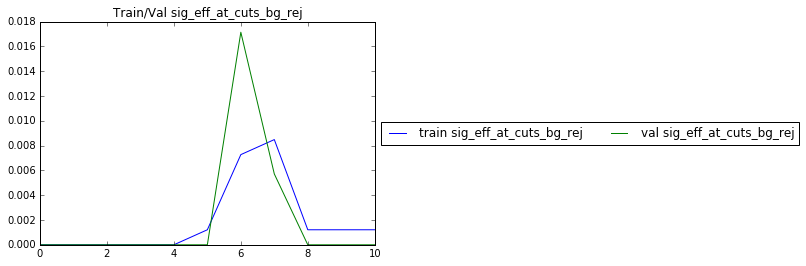

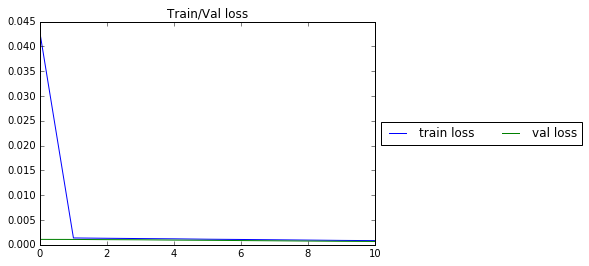

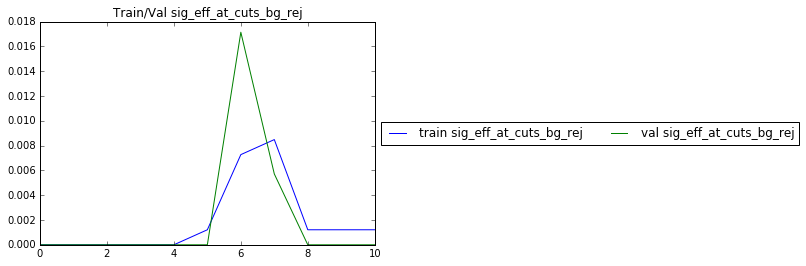

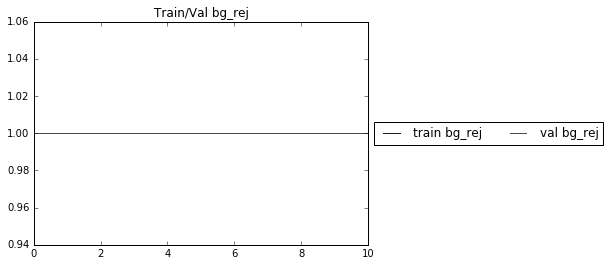

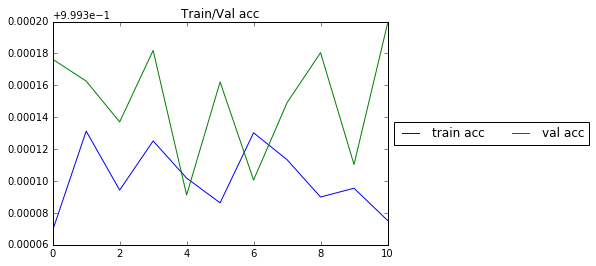

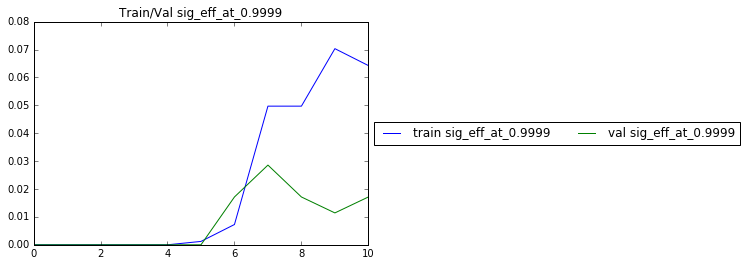

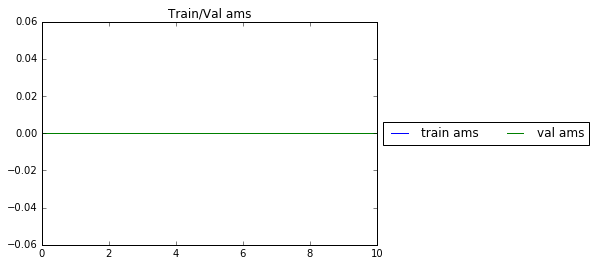

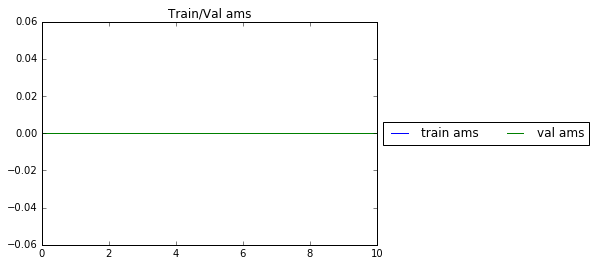

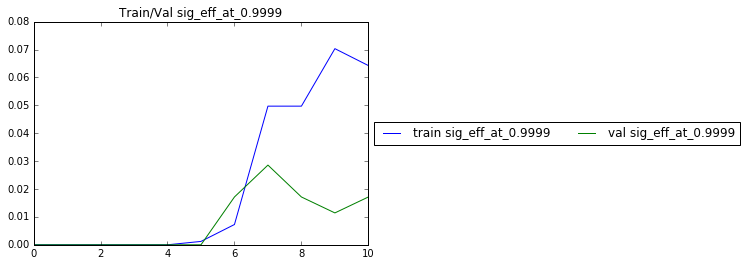

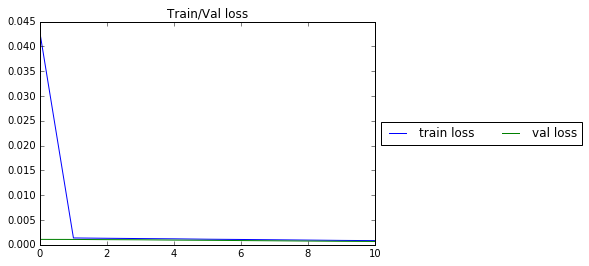

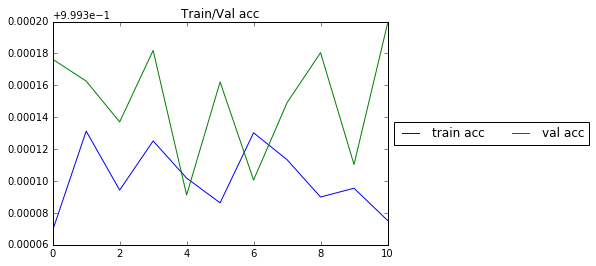

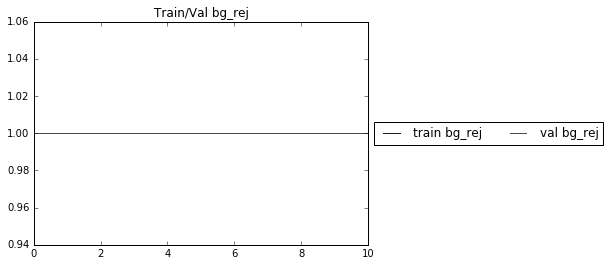

Epoch 11 of 20000 took 38.894s
		tr_sig_eff:		0.0000 %
		tr_phys_cuts_sig_eff:		23.3939 %
		tr_sig_eff_at_cuts_bg_rej:		0.1212 %
		tr_phys_cuts_ams:		0.0005
		tr_phys_cuts_bg_rej:		99.9999 %
		tr_bg_rej:		100.0000 %
		tr_acc:		99.9375 %
		tr_ams:		0.0000
		tr_sig_eff_at_0.9999:		6.4242 %
		tr_loss:		0.0008
	Validation took 3.940s
		val_sig_eff:		0.0000 %
		val_phys_cuts_ams:		0.0001
		val_loss:		0.0007
		val_phys_cuts_bg_rej:		99.9998 %
		val_sig_eff_at_cuts_bg_rej:		0.0000 %
		val_sig_eff_at_0.9999:		1.7143 %
		val_ams:		0.0000
		val_phys_cuts_sig_eff:		25.1429 %
		val_acc:		99.9499 %
		val_bg_rej:		100.0000 %


beginning epoch 11
beginning epoch 11


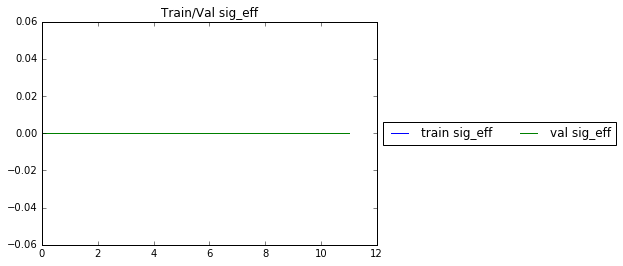

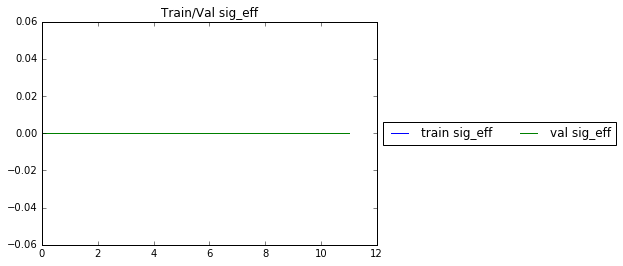

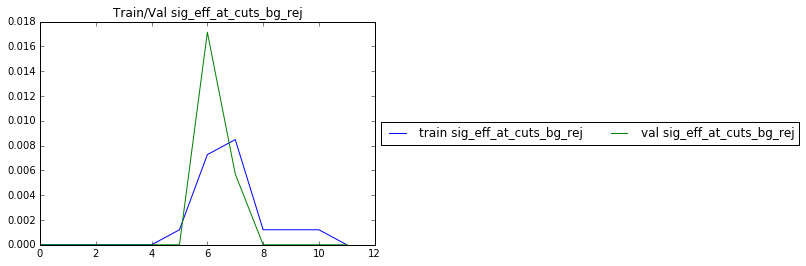

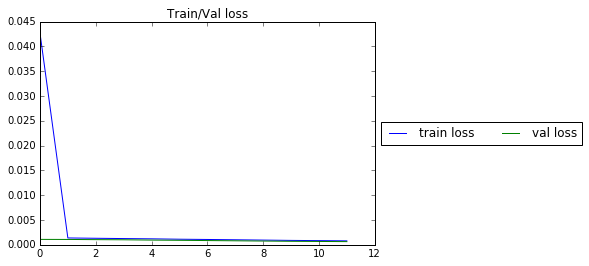

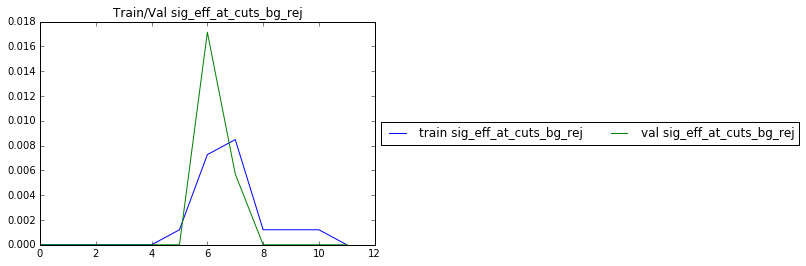

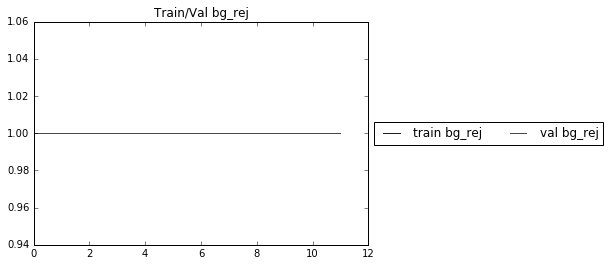

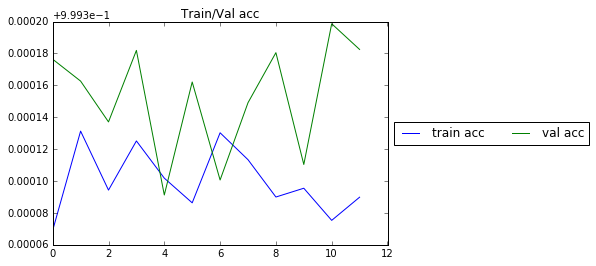

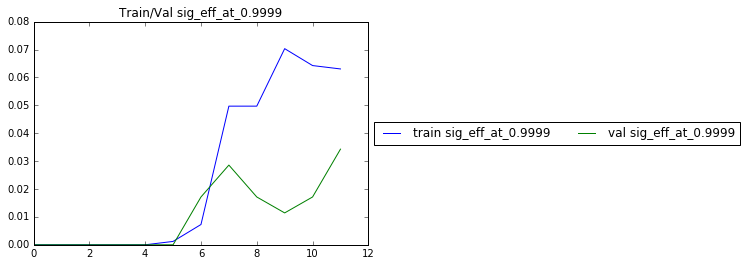

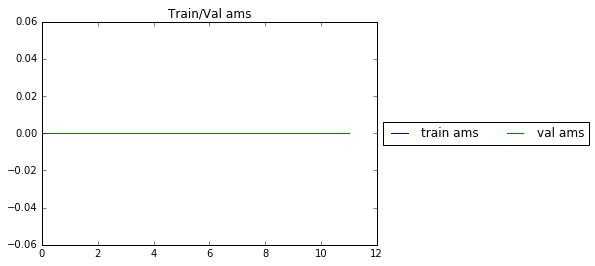

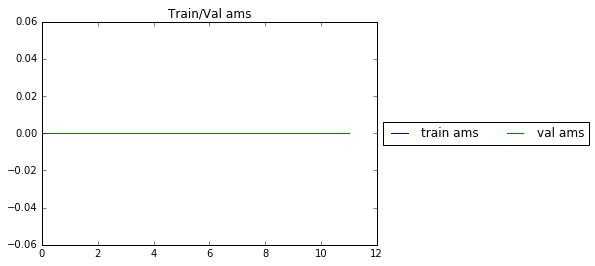

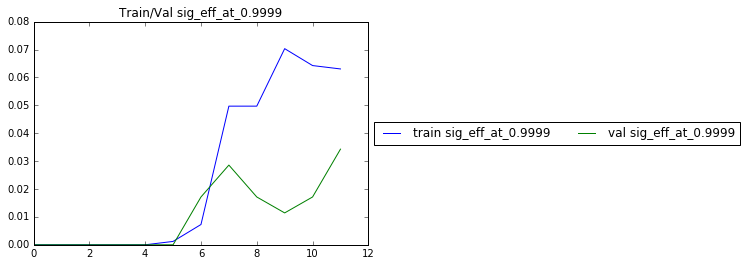

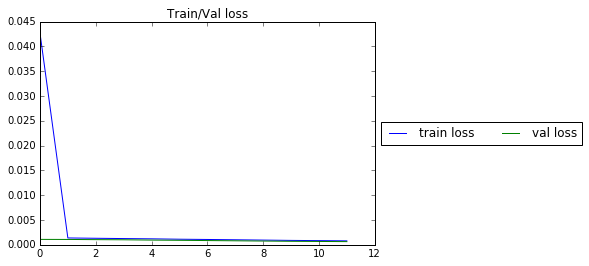

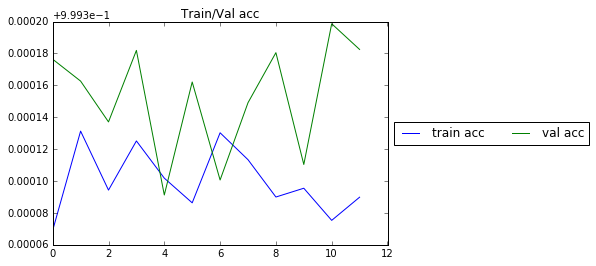

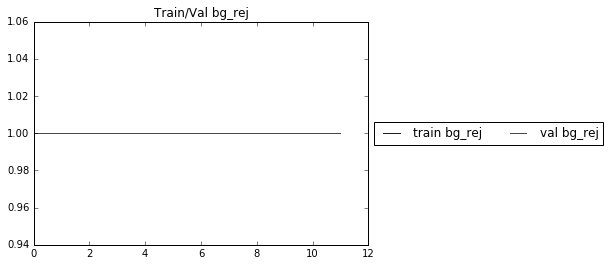

Epoch 12 of 20000 took 39.423s
		tr_sig_eff:		0.0000 %
		tr_phys_cuts_sig_eff:		23.3939 %
		tr_sig_eff_at_cuts_bg_rej:		0.0000 %
		tr_phys_cuts_ams:		0.0005
		tr_phys_cuts_bg_rej:		99.9999 %
		tr_bg_rej:		100.0000 %
		tr_acc:		99.9390 %
		tr_ams:		0.0000
		tr_sig_eff_at_0.9999:		6.3030 %
		tr_loss:		0.0008
	Validation took 3.913s
		val_sig_eff:		0.0000 %
		val_phys_cuts_ams:		0.0001
		val_loss:		0.0006
		val_phys_cuts_bg_rej:		99.9998 %
		val_sig_eff_at_cuts_bg_rej:		0.0000 %
		val_sig_eff_at_0.9999:		3.4286 %
		val_ams:		0.0000
		val_phys_cuts_sig_eff:		25.1429 %
		val_acc:		99.9483 %
		val_bg_rej:		100.0000 %


beginning epoch 12


KeyboardInterrupt: 

In [3]:
if __name__ == "__main__":
    
    kwargs = setup_kwargs()
    
    h5_prefix = "/global/cscratch1/sd/racah/atlas_h5/"
    
    loader_kwargs = dict(bg_cfg_file=[join(h5_prefix, "train_jetjet_JZ%i.h5"% (i)) for i in range(3,12)],
                    sig_cfg_file=join(h5_prefix, "train_GG_RPV10_1400_850.h5"),
                    num_events=kwargs["num_events"], 
                    type_="hdf5",
                    use_premade=False,
                       test=kwargs["test"],
                       desired_dims={"phi":64, "eta": 64})
    
    if kwargs["mode"] == "anomaly":
        dl = AnomalyLoader(**loader_kwargs)
    else:
        dl = DataLoader(**loader_kwargs)
    data = dl.load_data()
    
    kwargs["input_shape"] = tuple([None] + list(data["tr"]["x"].shape[1:]))
    kwargs["num_train"], kwargs["num_val"] = data["tr"]["x"].shape[0], data["val"]["x"].shape[0]
    kwargs["logger"].info(str(kwargs))
    dump_hyperparams(dic=kwargs,path=kwargs["save_path"])
    if kwargs["ae"]:
        net = caen
    else:
        net = bcc
    networks, fns = net.build_network(kwargs, net.build_layers(kwargs))
    
    
    tv = TrainVal(data, kwargs, fns, networks)
    tv.train()

    
    
    

In [ ]:
# h5_prefix = "/project/projectdirs/dasrepo/atlas_rpv_susy/hdf5/prod003_2016_11_14"

# a=h5py.File(join(h5_prefix,"GG_RPV10_1400_850.h5" ))

# w=a["event_10"]["weight"]

# w.value

# g.value

# # x.shape

# # #test
# # x, y, xv,yv = load_train_val(num_events=100000)

# # def test_network(network_path):
# #     x_te, y_te = load_test()

# #     net = pickle.load(open(network_path))

# #     cfg = build_network(network_kwargs,net)
# #     return cfg['val_fn'](x_te, y_te)

# # network_path = './results/run84/model.pkl'



# # net = pickle.load(open(network_path))

# # cfg = build_network(network_kwargs,net)

# # y_pred = cfg['out_fn'](xv)

# # y_pred = y_pred[0]

# # best_sig = xv[np.argmax(y_pred[:,1])]

# # best_bg = xv[np.argmin(y_pred[:,1])]

# # plot_example(np.squeeze(best_sig))

# # plot_example(np.squeeze(best_bg))

# # inds = np.argsort(y_pred[:,1], axis=0)

# # best_bgs = np.squeeze(xv[inds[:25]])

# # best_sigs = np.squeeze(xv[inds[-26:-1]])

# # plot_examples(best_bgs,5, run_dir,"best_bg")

# # plot_examples(best_sigs,5, run_dir, "best_sig")

# # plot_filters(net,save_dir=run_dir)

# # plot_feature_maps(best_bgs[0], net, run_dir, name="best_bg")

# # best_bg = np.expand_dims(np.expand_dims(best_bgs[0], axis=0),axis=0)
# # best_sig = np.expand_dims(np.expand_dims(best_sigs[-1], axis=0),axis=0)
# # saliency_fn = compile_saliency_function(net)
# # saliency, max_class = saliency_fn(best_sig)
# # #np.squeeze(np.abs(saliency)).shape
# # show_images(best_sigs[-1], saliency, max_class, "default gradient", save_dir=run_dir)



